# 1. Loading Data and Early Explorations

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from helpers import feature_importance, pearson_correlation, plot_data, trendline, transform_2D, seed_everything, set_axis_style
from calculate import ml_predict, val_score

In [3]:
# Seed all parameters to ensure repeatability
seed_everything()

In [189]:
# Read in our data file
df = pd.read_csv('CO Hydrogenation Training.csv')

In [190]:
df

,Adsorbate 1,Adsorbate 2,num of NM atoms 1,num of NM atoms 2,num of H 1,num of H 2,Atomic num 1,Atomic num 2,PE 1,PE 2,...,IE 1 add IE 2,Average EA of Adsorbates squared,Average PE of Adsorbates squared,Average Covalent Radius of Adosrbates squared,Average FIE of Adsorbates squared,Average VdW Radius squared,Average Atomic num of Adsorbates squared,Average num of Valence Electron squared,Average IE squared,G_CHO - Gco
0,O,O,1.0,1.0,0.0,0.0,8.0,8.00,3.44,3.44,...,27.24,2.13,11.83,0.40,185.45,2.31,64.00,36.00,185.50,0.17026
1,O,OH,1.0,2.0,0.0,1.0,8.0,4.50,3.44,2.82,...,26.64,1.65,9.80,0.31,185.31,2.07,39.06,42.25,177.42,0.29583
2,O,Cl,1.0,1.0,0.0,0.0,8.0,17.00,3.44,3.16,...,26.59,6.43,10.89,0.66,176.69,2.67,156.25,42.25,176.76,0.30107
3,OH,O,2.0,1.0,1.0,0.0,4.5,8.00,2.82,3.44,...,26.64,1.65,9.80,0.31,185.31,2.07,39.06,42.25,177.42,0.29583
4,OH,OH,2.0,2.0,1.0,1.0,4.5,4.50,2.82,2.82,...,26.04,1.23,7.95,0.23,185.18,1.85,20.25,49.00,169.52,0.48339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Cl,Br,1.0,1.0,0.0,0.0,17.0,35.00,3.16,2.96,...,24.78,12.16,9.36,1.13,153.52,3.24,676.00,49.00,153.51,0.27497
60,Br,CH,1.0,2.0,0.0,1.0,35.0,3.50,2.96,2.38,...,22.45,4.78,7.12,0.71,146.93,2.72,370.56,36.00,126.00,0.11547
61,Br,CH2,1.0,3.0,0.0,2.0,35.0,2.67,2.96,2.32,...,22.21,4.59,6.96,0.64,151.69,2.59,354.69,42.25,123.32,0.16181
62,Br,SH,1.0,2.0,0.0,1.0,35.0,8.50,2.96,2.39,...,22.23,5.71,7.16,0.83,141.53,2.81,473.06,49.00,123.54,0.26969


In [191]:
df.shape

(64, 55)

In [192]:
adsorbates = df[['Adsorbate 1', 'Adsorbate 2']]

In [193]:
adsorbates

,Adsorbate 1,Adsorbate 2
0,O,O
1,O,OH
2,O,Cl
3,OH,O
4,OH,OH
...,...,...
59,Cl,Br
60,Br,CH
61,Br,CH2
62,Br,SH


In [194]:
# Drop adsorbates 1 and 2 from our feature space as they will not participate in training
df = df.drop(columns = ['Adsorbate 1', 'Adsorbate 2'])

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 53 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   num of NM atoms 1                              64 non-null     float64
 1   num of NM atoms 2                              64 non-null     float64
 2   num of H 1                                     64 non-null     float64
 3   num of H 2                                     64 non-null     float64
 4   Atomic num 1                                   64 non-null     float64
 5   Atomic num 2                                   64 non-null     float64
 6   PE 1                                           64 non-null     float64
 7   PE 2                                           64 non-null     float64
 8   Covalent Radius 1                              64 non-null     float64
 9   Covalent Radius 2                              64 non-nu

<b> No missing data observed in training dataset </b>

In [196]:
df.describe()

,num of NM atoms 1,num of NM atoms 2,num of H 1,num of H 2,Atomic num 1,Atomic num 2,PE 1,PE 2,Covalent Radius 1,Covalent Radius 2,...,IE 1 add IE 2,Average EA of Adsorbates squared,Average PE of Adsorbates squared,Average Covalent Radius of Adosrbates squared,Average FIE of Adsorbates squared,Average VdW Radius squared,Average Atomic num of Adsorbates squared,Average num of Valence Electron squared,Average IE squared,G_CHO - Gco
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.00000,64.000000,64.000000
mean,1.937500,1.937500,0.937500,0.937500,8.429844,8.429844,2.735938,2.735938,0.650625,0.650625,...,23.905000,2.784531,7.579375,0.445156,172.609844,2.266875,102.550469,41.71875,144.570000,0.194665
std,0.973865,0.973865,0.973865,0.973865,8.020709,8.020709,0.478578,0.478578,0.211884,0.211884,...,2.634792,2.624086,1.805659,0.213653,28.835132,0.360079,151.817110,8.77242,32.550804,0.098376
min,1.000000,1.000000,0.000000,0.000000,2.250000,2.250000,2.290000,2.290000,0.420000,0.420000,...,20.200000,0.160000,5.390000,0.200000,124.760000,1.750000,9.770000,20.25000,102.010000,-0.012410
25%,1.000000,1.000000,0.000000,0.000000,3.500000,3.500000,2.380000,2.380000,0.480000,0.480000,...,21.862500,0.962500,6.225000,0.290000,153.062500,2.000000,20.250000,36.00000,119.515000,0.124317
50%,2.000000,2.000000,1.000000,1.000000,6.000000,6.000000,2.565000,2.565000,0.595000,0.595000,...,23.530000,1.630000,7.030000,0.360000,163.785000,2.180000,39.060000,42.25000,138.415000,0.189260
75%,2.250000,2.250000,1.250000,1.250000,8.625000,8.625000,2.960000,2.960000,0.710000,0.710000,...,25.852500,4.800000,9.360000,0.560000,186.147500,2.567500,93.952500,49.00000,167.090000,0.269690
max,4.000000,4.000000,3.000000,3.000000,35.000000,35.000000,3.980000,3.980000,1.140000,1.140000,...,30.440000,12.160000,11.830000,1.130000,240.720000,3.240000,676.000000,56.25000,231.650000,0.483390


# 2. Normalizing and Creating Dummy Variables

In [197]:
# print the features names for ease of use later
df.columns

Index(['num of NM atoms 1', 'num of NM atoms 2', 'num of H 1', 'num of H 2',
       'Atomic num 1', 'Atomic num 2', 'PE 1', 'PE 2', 'Covalent Radius 1',
       'Covalent Radius 2', 'FIE 1', 'FIE 2', 'IE 1', 'IE 2', 'EA 1', 'EA 2',
       'VdW Radius 1', 'VdW Radius 2', 'num of Valence Electron 1',
       'num of Valence Electron 2', 'num of Atoms', 'num of H',
       'Average Atomic num', 'Average PE', 'Average Covalent Radius',
       'Average FIE', 'Average IE', 'Average EA', 'Average VdW Radius',
       'Average num of Valence Electron', 'PE 1 minus PE 2', 'PE 1 add PE 2',
       'Covalent Radius 1 minus Covalent Radius 2',
       'Covalent Radius 1 add Covalent Radius 2',
       'VdW Radius 1 minus VdW Radius 2', 'VdW Radius 1 add VdW Radius 2',
       'FIE 1 minus FIE 2', 'FIE 1 add FIE 2', 'EA 1 minus EA 2',
       'EA 1 add EA 2', 'num of Valence 1 minus num of Valence 2',
       'num of Valence 1 add num of Valence 2', 'IE 1 minus IE 2',
       'IE 1 add IE 2', 'Average EA of A

In [198]:
from sklearn.preprocessing import MinMaxScaler

# instantiate scaler method
scaler = MinMaxScaler()

# identify all numerical features to be normalized
numerical = ['num of NM atoms 1', 'num of NM atoms 2', 'num of H 1', 'num of H 2',
       'Average Atomic num 1', 'Average Atomic num 2', 'Average PE 1',
       'Average PE 2', 'Average Covalent Radius 1',
       'Average Covalent Radius 2', 'Average FIE 1', 'Average FIE 2', 'IE 1',
       'IE 2', 'Average EA 1', 'Average EA 2', 'Average VdW Radius 1',
       'Average VdW Radius 2', 'num of Valence Electron 1',
       'num of Valence Electron 2', 'num of Atoms', 'num of H', 'Atomic num',
       'PE', 'Covalent Radius', 'FIE', 'IE', 'EA', 'VdW Radius',
       'Average num of Valence Electron', 'PE 1 minus PE 2', 'PE 1 add PE 2',
       'Covalent Radius 1 minus Covalent Radius 2',
       'Covalent Radius 1 add Covalent Radius 2',
       'VdW Radius 1 minus Avg VdW Radius 2',
       'VdW Radius 1 add Avg VdW Radius 2', 'FIE 1 minus FIE 2',
       'FIE 1 add FIE 2', 'EA 1 minus EA 2', 'EA 1 add EA 2',
       'num of Valence 1 minus num of Valence 2',
       'num of Valence 1 add num of Valence 2', 'IE 1 minus IE 2',
       'IE 1 add IE 2', 'Averaged EA of Adsorbates squared',
       'Averaged PE of Adsorbates squared',
       'Average Covalent Radius of Adosrbates squared',
       'Averaged FIE of Adsorbates squared', 'Averaged VdW Radius squared',
       'Averaged Atomic num of Adsorbates squared',
       'Averaged num of Valence Electron squared', 'Averaged IE squared']

In [199]:
# scale the features
#df[numerical] = scaler.fit_transform(df[numerical])

In [200]:
#categorical = pd.get_dummies(df[['Adsorbate 1', 'Adsorbate 2']])
#final_df = pd.merge(categorical, df, how='right', left_index=True, right_index=True)
#final_df = final_df.drop(columns=['Adsorbate 1', 'Adsorbate 2'])

In [201]:
final_df = df

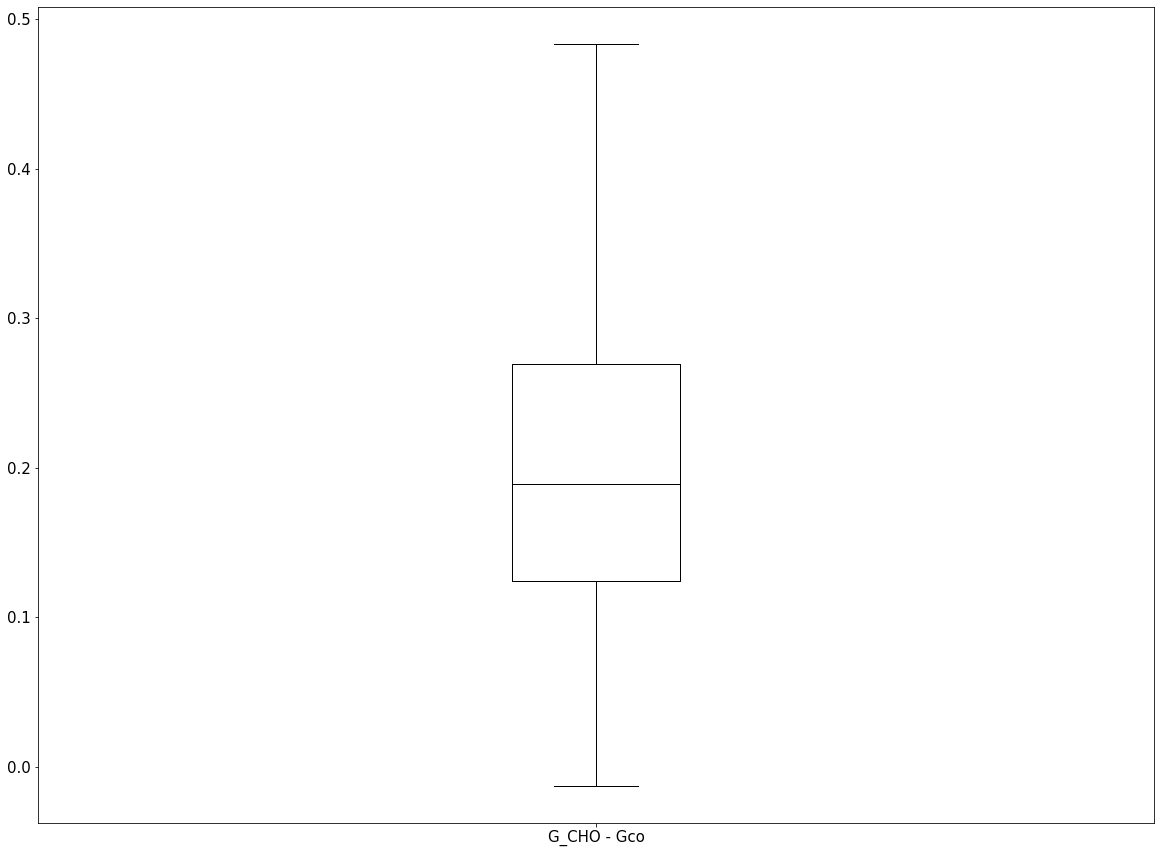

In [203]:
final_df.boxplot(color=dict(boxes='black', whiskers='black', medians='black', caps='black'), 
                      column='G_CHO - Gco', grid=False, figsize=(20, 15));

# 3. Machine Learning

## Round 1

In [17]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Instantiate regressor algorithms
GBR = GradientBoostingRegressor(random_state=42)
KNR = KNeighborsRegressor()
RFR = RandomForestRegressor(random_state=42)
SR = SVR()
ridge = Ridge(random_state=42)
xgbr = XGBRegressor(random_state=42)
light = LGBMRegressor(random_state=42)

regressors = [GBR, KNR, RFR, SR, ridge, xgbr, light]

In [18]:
# Create an empty df to save the results of each regressor for each round of feature removal
results_df = pd.DataFrame(columns = ['Gradient Boosting Regressor', 'K-Nearest Regressor', 'Random Forest Regressor', 'Support Vector Regressor', 
                                     'Ridge Regressor', 'X-Gradient Boosting Regressor', 'LightGBM Regressor'])

In [19]:
start = time.time()
val_score(final_df, 1, regressors, results_df)
end = time.time()

print('Time taken to run this iteration was {} seconds'.format(int(end - start)))


Time taken to run this iteration was 47 seconds


In [20]:
results_df

,Gradient Boosting Regressor,K-Nearest Regressor,Random Forest Regressor,Support Vector Regressor,Ridge Regressor,X-Gradient Boosting Regressor,LightGBM Regressor
1,"[0.0215, 0.0333]","[0.0835, 0.0995]","[0.0387, 0.053]","[0.084, 0.0985]","[0.0683, 0.0858]","[0.0276, 0.0436]","[0.057, 0.0752]"


### Feature Importance

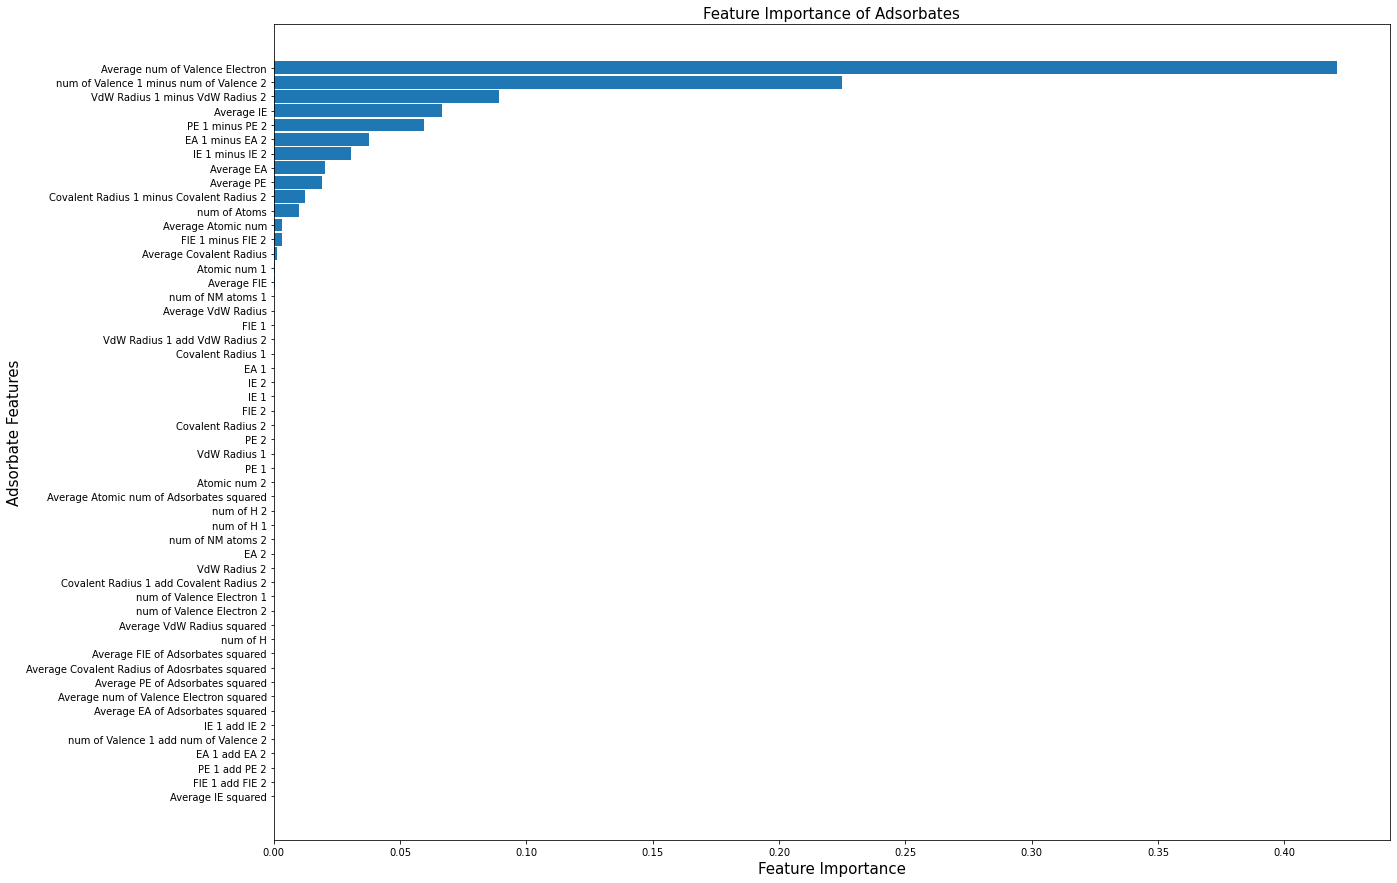

In [21]:
feature_importance(XGBRegressor(), final_df)

### Pearson's Correlation

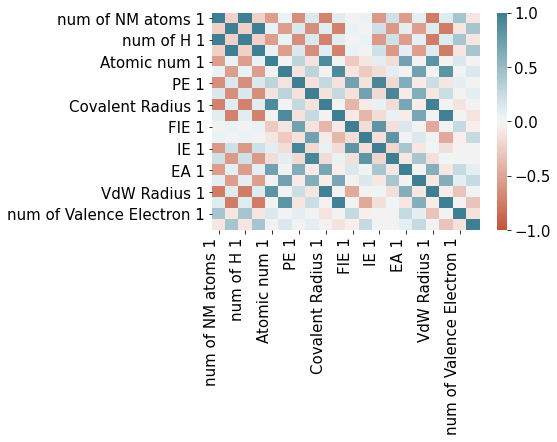

In [22]:
pearson_correlation(final_df)

## Round 2

In [23]:
# make a copy of the df from the previoud edition
df_v2 = final_df.copy()

In [24]:
# Drop the features
df_v2 = df_v2.drop(columns = ['PE 1 add PE 2',
       'Covalent Radius 1 add Covalent Radius 2','VdW Radius 1 add VdW Radius 2',
       'FIE 1 add FIE 2', 'EA 1 add EA 2',
       'num of Valence 1 add num of Valence 2',
       'IE 1 add IE 2'])

In [25]:
start = time.time()
val_score(df_v2, 2, regressors, results_df)
end = time.time()

print('Time taken to run this iteration was {} seconds'.format(int(end - start)))


Time taken to run this iteration was 44 seconds


In [26]:
results_df

,Gradient Boosting Regressor,K-Nearest Regressor,Random Forest Regressor,Support Vector Regressor,Ridge Regressor,X-Gradient Boosting Regressor,LightGBM Regressor
1,"[0.0215, 0.0333]","[0.0835, 0.0995]","[0.0387, 0.053]","[0.084, 0.0985]","[0.0683, 0.0858]","[0.0276, 0.0436]","[0.057, 0.0752]"
2,"[0.0226, 0.0352]","[0.0835, 0.0995]","[0.0389, 0.0535]","[0.0841, 0.0985]","[0.0687, 0.0862]","[0.0279, 0.0441]","[0.057, 0.0752]"


### Feature Importance and Correlation (Round 2)

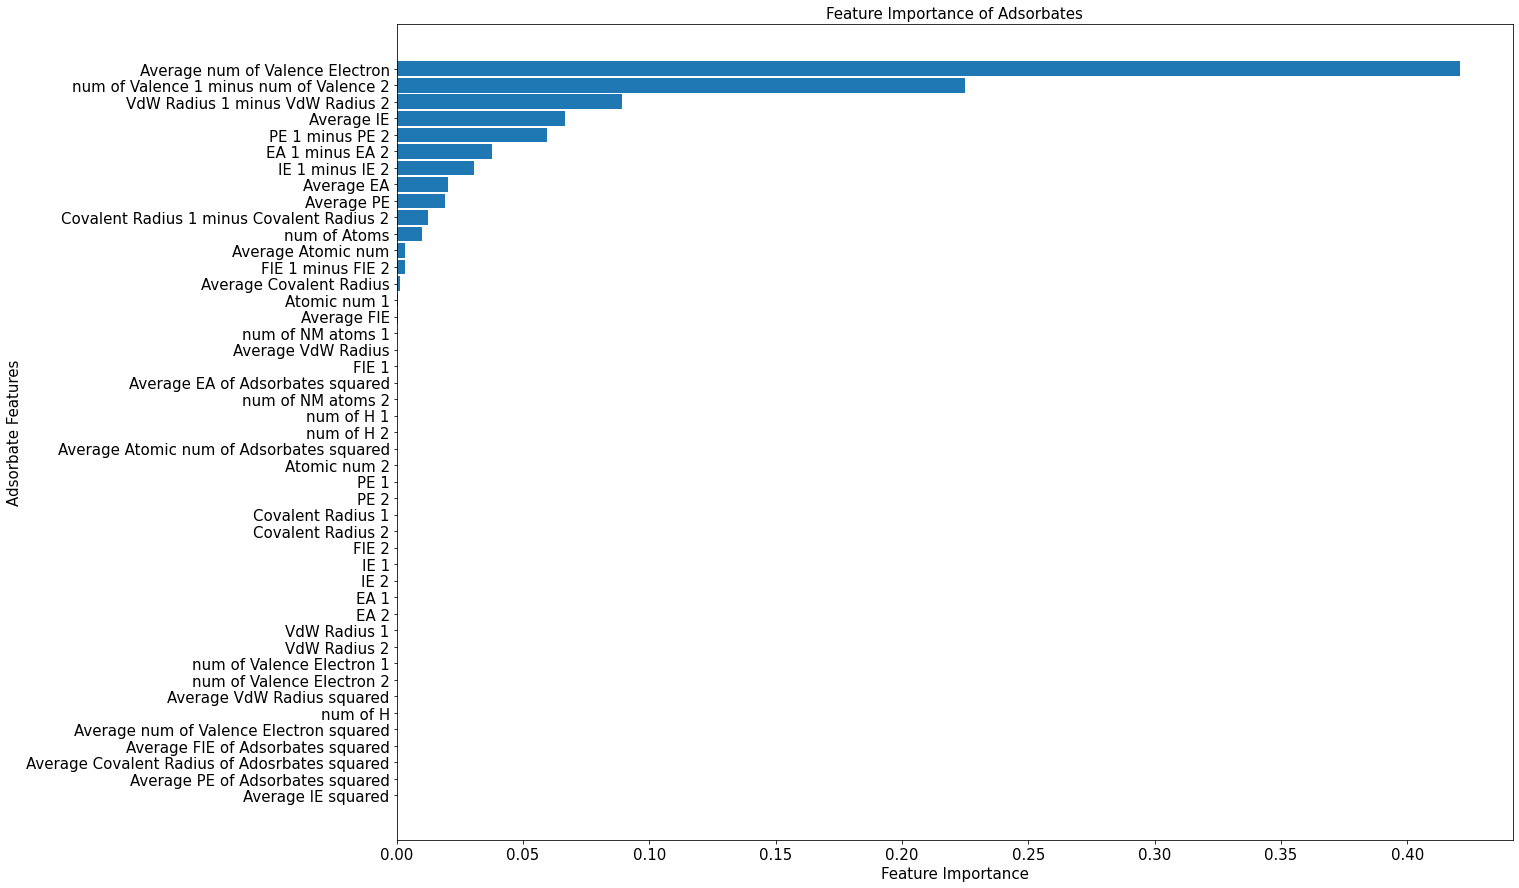

In [27]:
feature_importance(XGBRegressor(), df_v2)

## Round 3

In [28]:
df_v3 = df_v2.copy()

### Justification for dropping features

low importance single features were removed in this iteration of adjustments.

- 12 features (6 pairs) of adsorbate features were removed

In [29]:
df_v3 = df_v3.drop(columns = ['Average EA of Adsorbates squared', 'Average PE of Adsorbates squared',
       'Average Covalent Radius of Adosrbates squared',
       'Average FIE of Adsorbates squared',
       'Average Atomic num of Adsorbates squared',
       'Average num of Valence Electron squared', 'Average IE squared'])

In [30]:
start = time.time()
val_score(df_v3, 3, regressors, results_df)
end = time.time()

print('Time taken to run this iteration was {} seconds'.format(int(end - start)))


Time taken to run this iteration was 43 seconds


In [31]:
results_df

,Gradient Boosting Regressor,K-Nearest Regressor,Random Forest Regressor,Support Vector Regressor,Ridge Regressor,X-Gradient Boosting Regressor,LightGBM Regressor
1,"[0.0215, 0.0333]","[0.0835, 0.0995]","[0.0387, 0.053]","[0.084, 0.0985]","[0.0683, 0.0858]","[0.0276, 0.0436]","[0.057, 0.0752]"
2,"[0.0226, 0.0352]","[0.0835, 0.0995]","[0.0389, 0.0535]","[0.0841, 0.0985]","[0.0687, 0.0862]","[0.0279, 0.0441]","[0.057, 0.0752]"
3,"[0.0229, 0.0354]","[0.0837, 0.0989]","[0.0396, 0.0544]","[0.0781, 0.0946]","[0.0628, 0.0799]","[0.0279, 0.0442]","[0.057, 0.0753]"


### Feature Importance and Correlation (Round 3)

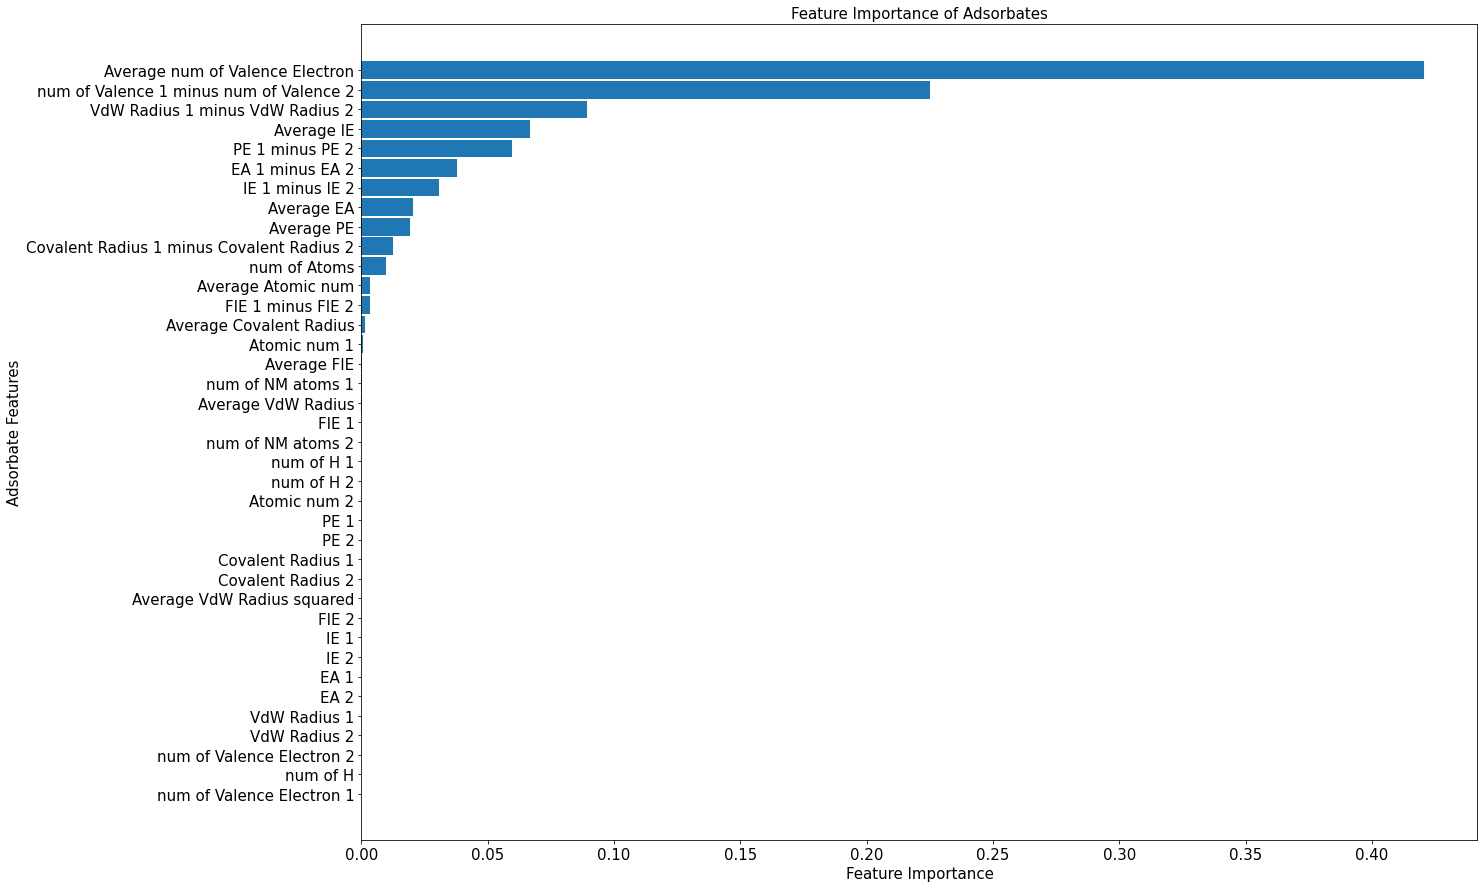

In [32]:
feature_importance(XGBRegressor(), df_v3)

## Round 4

In [33]:
df_v4 = df_v3.copy()

In [34]:
df_v4 = df_v4.drop(columns = ['num of H 1', 'num of H 2', 'num of H', 'FIE 1',
       'FIE 2', 'IE 1', 'IE 2'])

In [35]:
start = time.time()
val_score(df_v4, 4, regressors, results_df)
end = time.time()

print('Time taken to run this iteration was {} seconds'.format(int(end - start)))


Time taken to run this iteration was 40 seconds


In [36]:
results_df

,Gradient Boosting Regressor,K-Nearest Regressor,Random Forest Regressor,Support Vector Regressor,Ridge Regressor,X-Gradient Boosting Regressor,LightGBM Regressor
1,"[0.0215, 0.0333]","[0.0835, 0.0995]","[0.0387, 0.053]","[0.084, 0.0985]","[0.0683, 0.0858]","[0.0276, 0.0436]","[0.057, 0.0752]"
2,"[0.0226, 0.0352]","[0.0835, 0.0995]","[0.0389, 0.0535]","[0.0841, 0.0985]","[0.0687, 0.0862]","[0.0279, 0.0441]","[0.057, 0.0752]"
3,"[0.0229, 0.0354]","[0.0837, 0.0989]","[0.0396, 0.0544]","[0.0781, 0.0946]","[0.0628, 0.0799]","[0.0279, 0.0442]","[0.057, 0.0753]"
4,"[0.0216, 0.0345]","[0.0847, 0.1012]","[0.0381, 0.053]","[0.0757, 0.0919]","[0.0607, 0.0776]","[0.0275, 0.0439]","[0.0573, 0.0758]"


### Feature Importance and Correlation (Round 4)

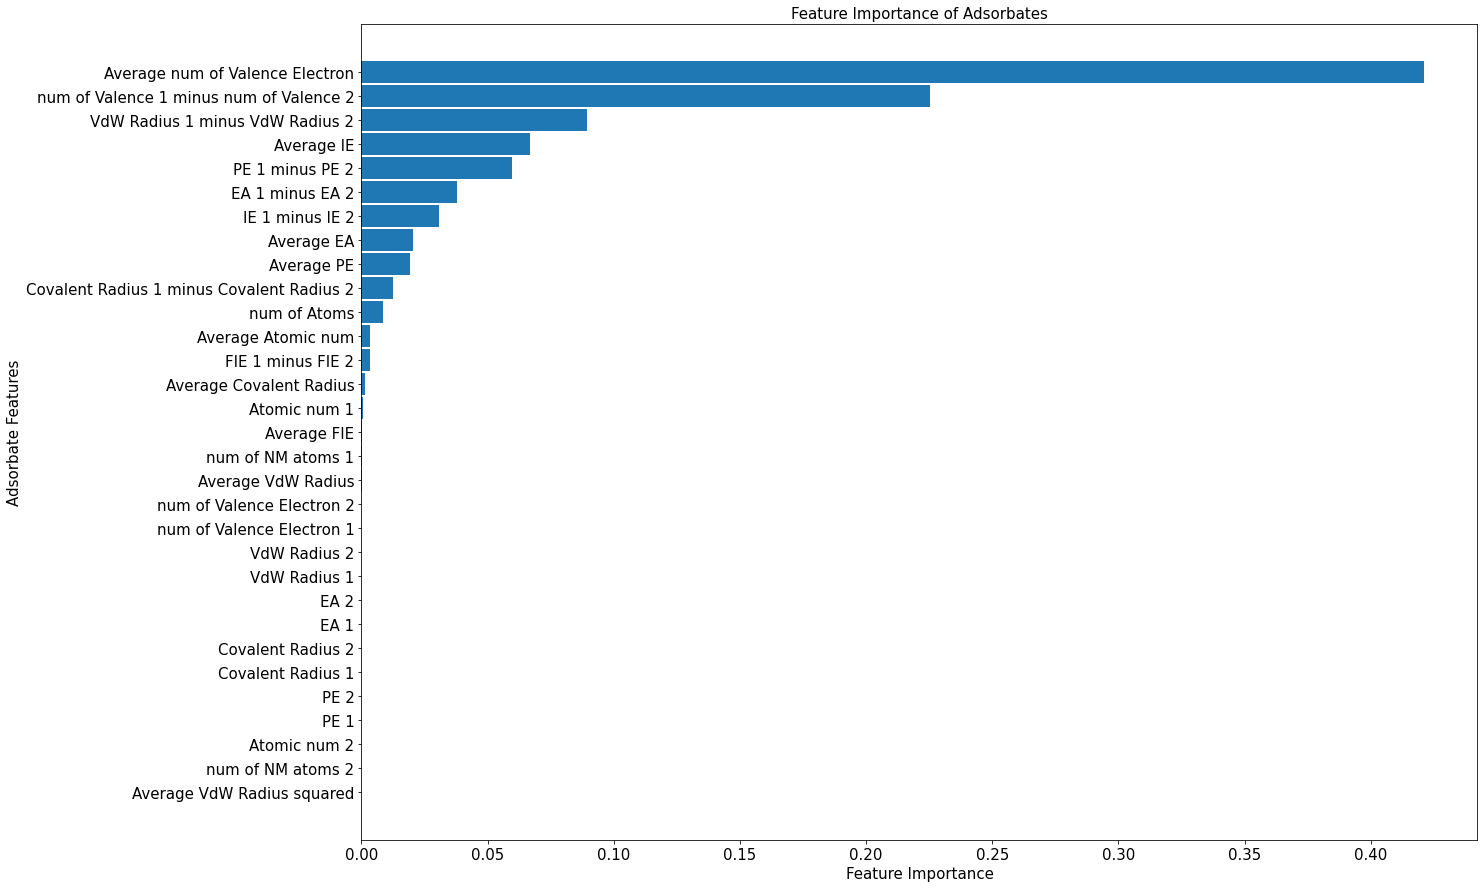

In [37]:
feature_importance(XGBRegressor(), df_v4)

## Round 5

In [39]:
df_v5 = df_v4.copy()

In [41]:
df_v5 = df_v5.drop(columns = ['num of NM atoms 1', 'num of NM atoms 2', 'EA 1', 'EA 2', 'Atomic num 1',
       'Atomic num 2', 'PE 1', 'PE 2', 'VdW Radius 1',
       'VdW Radius 2', 'Covalent Radius 1', 'Covalent Radius 2', 
       'num of Valence Electron 1', 'num of Valence Electron 2', 'Average VdW Radius squared', 'Average VdW Radius',
       'Average FIE'])

In [42]:
start = time.time()
val_score(df_v5, 5, regressors, results_df)
end = time.time()

print('Time taken to run this iteration was {} seconds'.format(int(end - start)))


Time taken to run this iteration was 36 seconds


In [43]:
results_df

,Gradient Boosting Regressor,K-Nearest Regressor,Random Forest Regressor,Support Vector Regressor,Ridge Regressor,X-Gradient Boosting Regressor,LightGBM Regressor
1,"[0.0215, 0.0333]","[0.0835, 0.0995]","[0.0387, 0.053]","[0.084, 0.0985]","[0.0683, 0.0858]","[0.0276, 0.0436]","[0.057, 0.0752]"
2,"[0.0226, 0.0352]","[0.0835, 0.0995]","[0.0389, 0.0535]","[0.0841, 0.0985]","[0.0687, 0.0862]","[0.0279, 0.0441]","[0.057, 0.0752]"
3,"[0.0229, 0.0354]","[0.0837, 0.0989]","[0.0396, 0.0544]","[0.0781, 0.0946]","[0.0628, 0.0799]","[0.0279, 0.0442]","[0.057, 0.0753]"
4,"[0.0216, 0.0345]","[0.0847, 0.1012]","[0.0381, 0.053]","[0.0757, 0.0919]","[0.0607, 0.0776]","[0.0275, 0.0439]","[0.0573, 0.0758]"
5,"[0.0139, 0.0253]","[0.0871, 0.1003]","[0.0309, 0.0438]","[0.0708, 0.0866]","[0.0544, 0.071]","[0.0139, 0.0275]","[0.056, 0.0749]"


### Feature Importance and Correlation (Round 5)

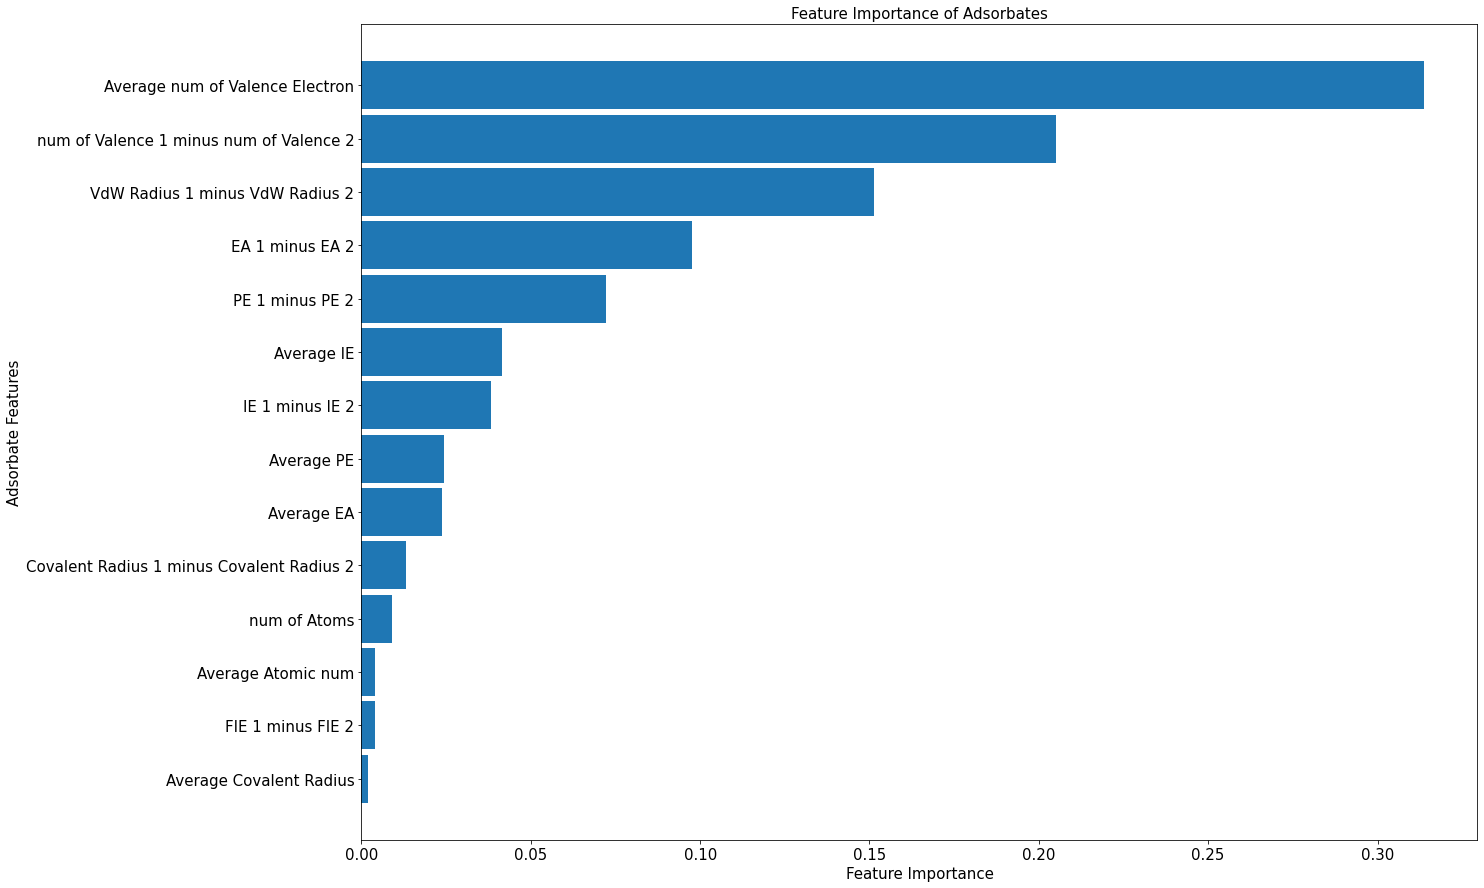

In [44]:
feature_importance(XGBRegressor(), df_v5)

### Pearson's Correlation (Round 5)

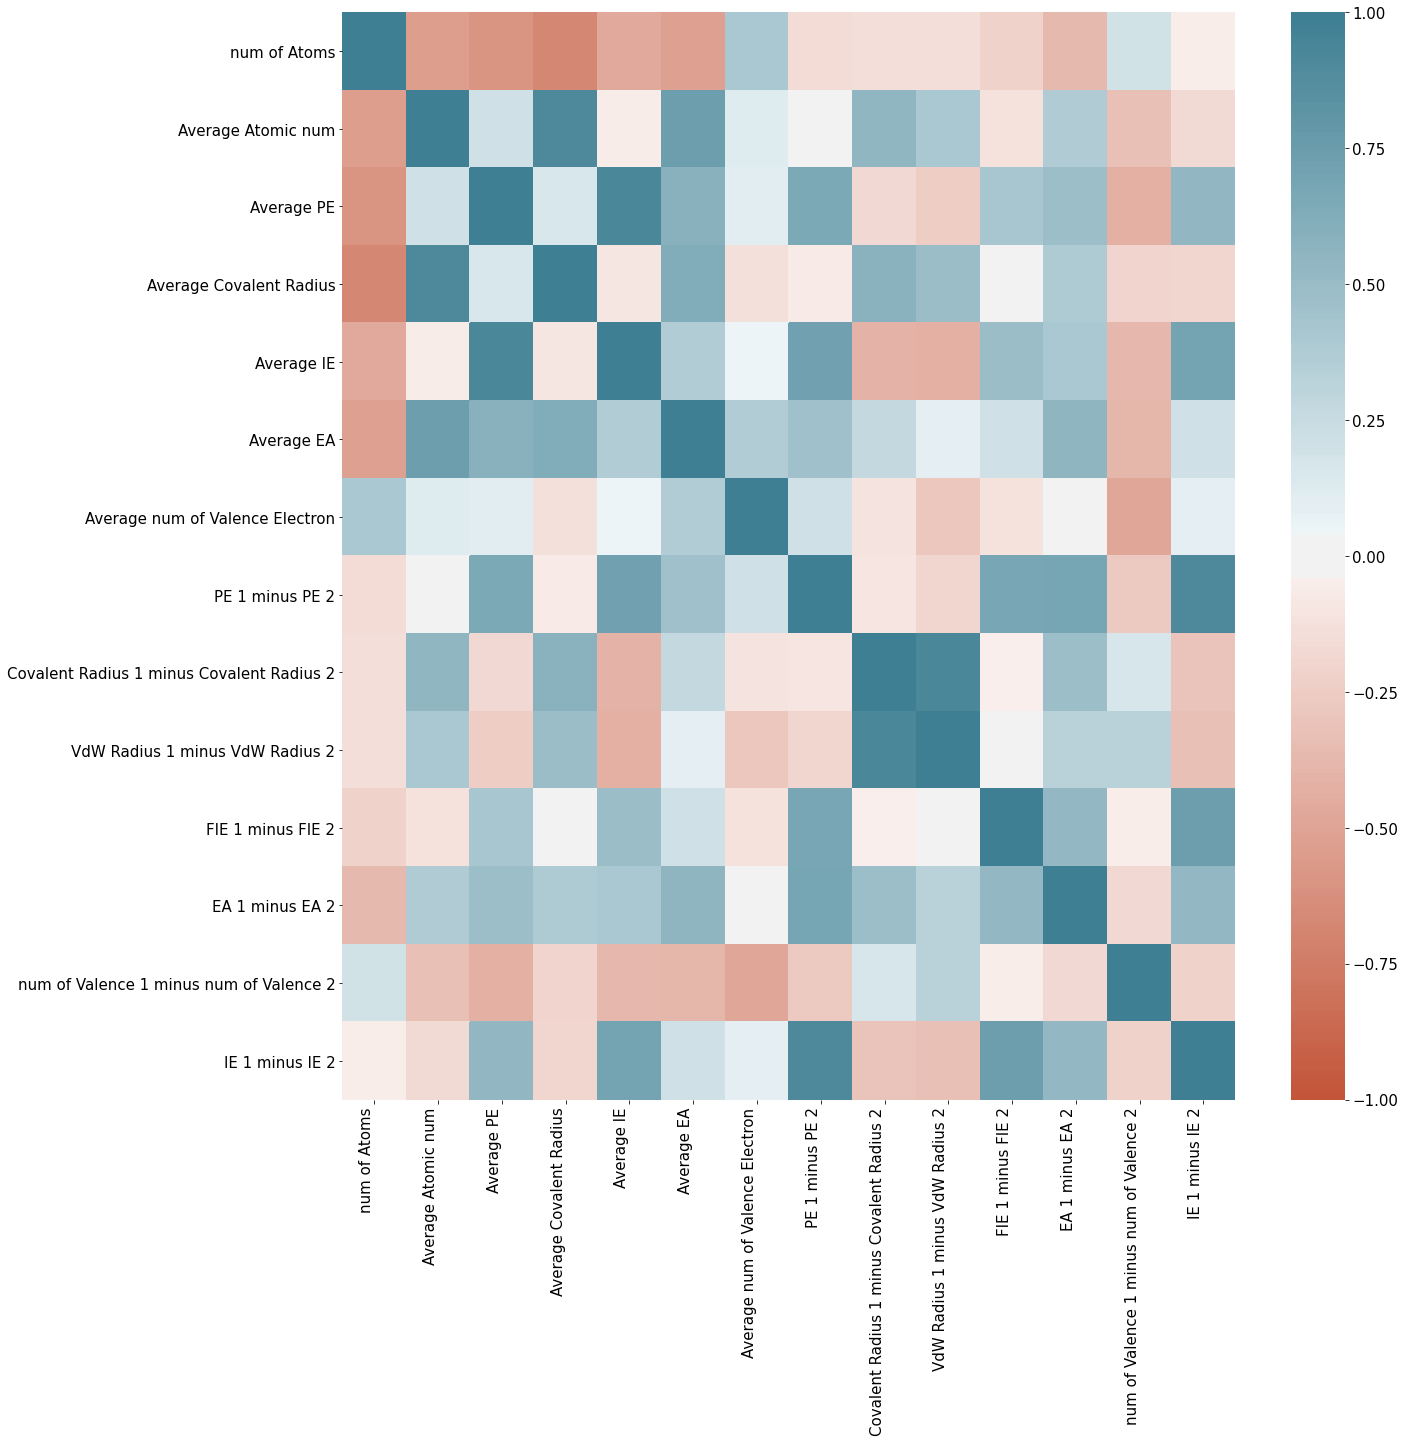

In [45]:
pearson_correlation(df_v5, last=True)

# 4. Hyperparameter Tuning

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
import xgboost
import lightgbm

In [47]:
GBR = GradientBoostingRegressor(random_state=42)
KNR = KNeighborsRegressor()
RFR = RandomForestRegressor(random_state=42)
SR = SVR()
ridge = Ridge(random_state=42)
xgbr = xgboost.XGBRegressor(random_state=42)
light = lightgbm.LGBMRegressor(random_state=42)

In [48]:
features = df_v5.iloc[:, 0:-1]
target = df_v5.iloc[:, -1]

In [49]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import RepeatedKFold


# Defining XGBR hyperparameters
xgbr_grid = {
    
    'min_child_weight': [1, 5, 10],
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, 10],
    'learning_rate': [0.3, 1, 2],
    'colsample_bytree': [0.1, 0.5, 0.8],
    'colsample_bylevel': [0.1, 0.5, 0.8],

}


fold = RepeatedKFold(n_splits = 10, n_repeats = 1, random_state = 42)

In [50]:
# Performing Randomized CV search on XGBR
xgbr_grid_cv = GridSearchCV(estimator = xgbr, cv = fold,
            param_grid = xgbr_grid, n_jobs = -1, scoring='neg_root_mean_squared_error',
            verbose = 5, return_train_score = True, refit = True)

In [51]:
xgbr_grid_cv.fit(features, target)

Fitting 10 folds for each of 972 candidates, totalling 9720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 2154 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 3018 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 3504 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 4584 tasks      | e

GridSearchCV(cv=RepeatedKFold(n_repeats=1, n_splits=10, random_state=42),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=n...
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_jobs=-1,
             param_grid={'colsample_bylevel': [0.1, 0.5, 0.8],
                         'colsampl

In [52]:
xgbr_grid_cv.best_params_

{'colsample_bylevel': 0.1,
 'colsample_bytree': 0.5,
 'learning_rate': 1,
 'max_depth': 4,
 'min_child_weight': 5,
 'n_estimators': 100}

In [53]:
xgbr_grid_cv.best_score_

-0.010207013991594158

In [54]:
xgbr_grid_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=1, max_delta_step=0, max_depth=4, min_child_weight=5,
             missing=nan, monotone_constraints='()', n_estimators=100,
             n_jobs=12, num_parallel_tree=1, random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [55]:
from sklearn.model_selection import cross_val_score

xgbr_optimized = xgbr_grid_cv.best_estimator_

rmse_score = cross_val_score(xgbr_optimized, features, target, cv = fold, scoring='neg_root_mean_squared_error')
mae_score = cross_val_score(xgbr_optimized, features, target, cv = fold, scoring='neg_mean_absolute_error')

In [56]:
optimized_xgbr_rmse = np.abs(rmse_score).mean()
optimized_xgbr_mae = np.abs(mae_score).mean()

In [57]:
optimized_xgbr_rmse, optimized_xgbr_mae

(0.010207013991594158, 0.004710190528743325)

# 5. Different Separation Ratios

In [58]:
from tqdm.auto import tqdm

separations = [2,3,4,5,6,7,8,9,10]

mae_results = []
rmse_results = []
r2_results = []

for split in tqdm(separations):
    fold = RepeatedKFold(n_splits=split, n_repeats=10, random_state=42)
    mae = cross_val_score(xgbr_optimized, features, target, cv=fold, scoring='neg_mean_absolute_error')
    rmse = cross_val_score(xgbr_optimized, features, target, cv=fold, scoring='neg_root_mean_squared_error')
    r2 = cross_val_score(xgbr_optimized, features, target, cv=fold, scoring='r2')
    mae_results.append(np.abs(mae).mean())
    rmse_results.append(np.abs(rmse).mean())
    r2_results.append(np.abs(r2).mean())

In [59]:
r2_results

[0.37312325407069924,
 0.6209958119807578,
 0.6954096998912158,
 0.7400373003252696,
 0.7894067971492224,
 0.8475352131669104,
 0.8414093945067815,
 0.9034399487912257,
 0.8556670833980823]

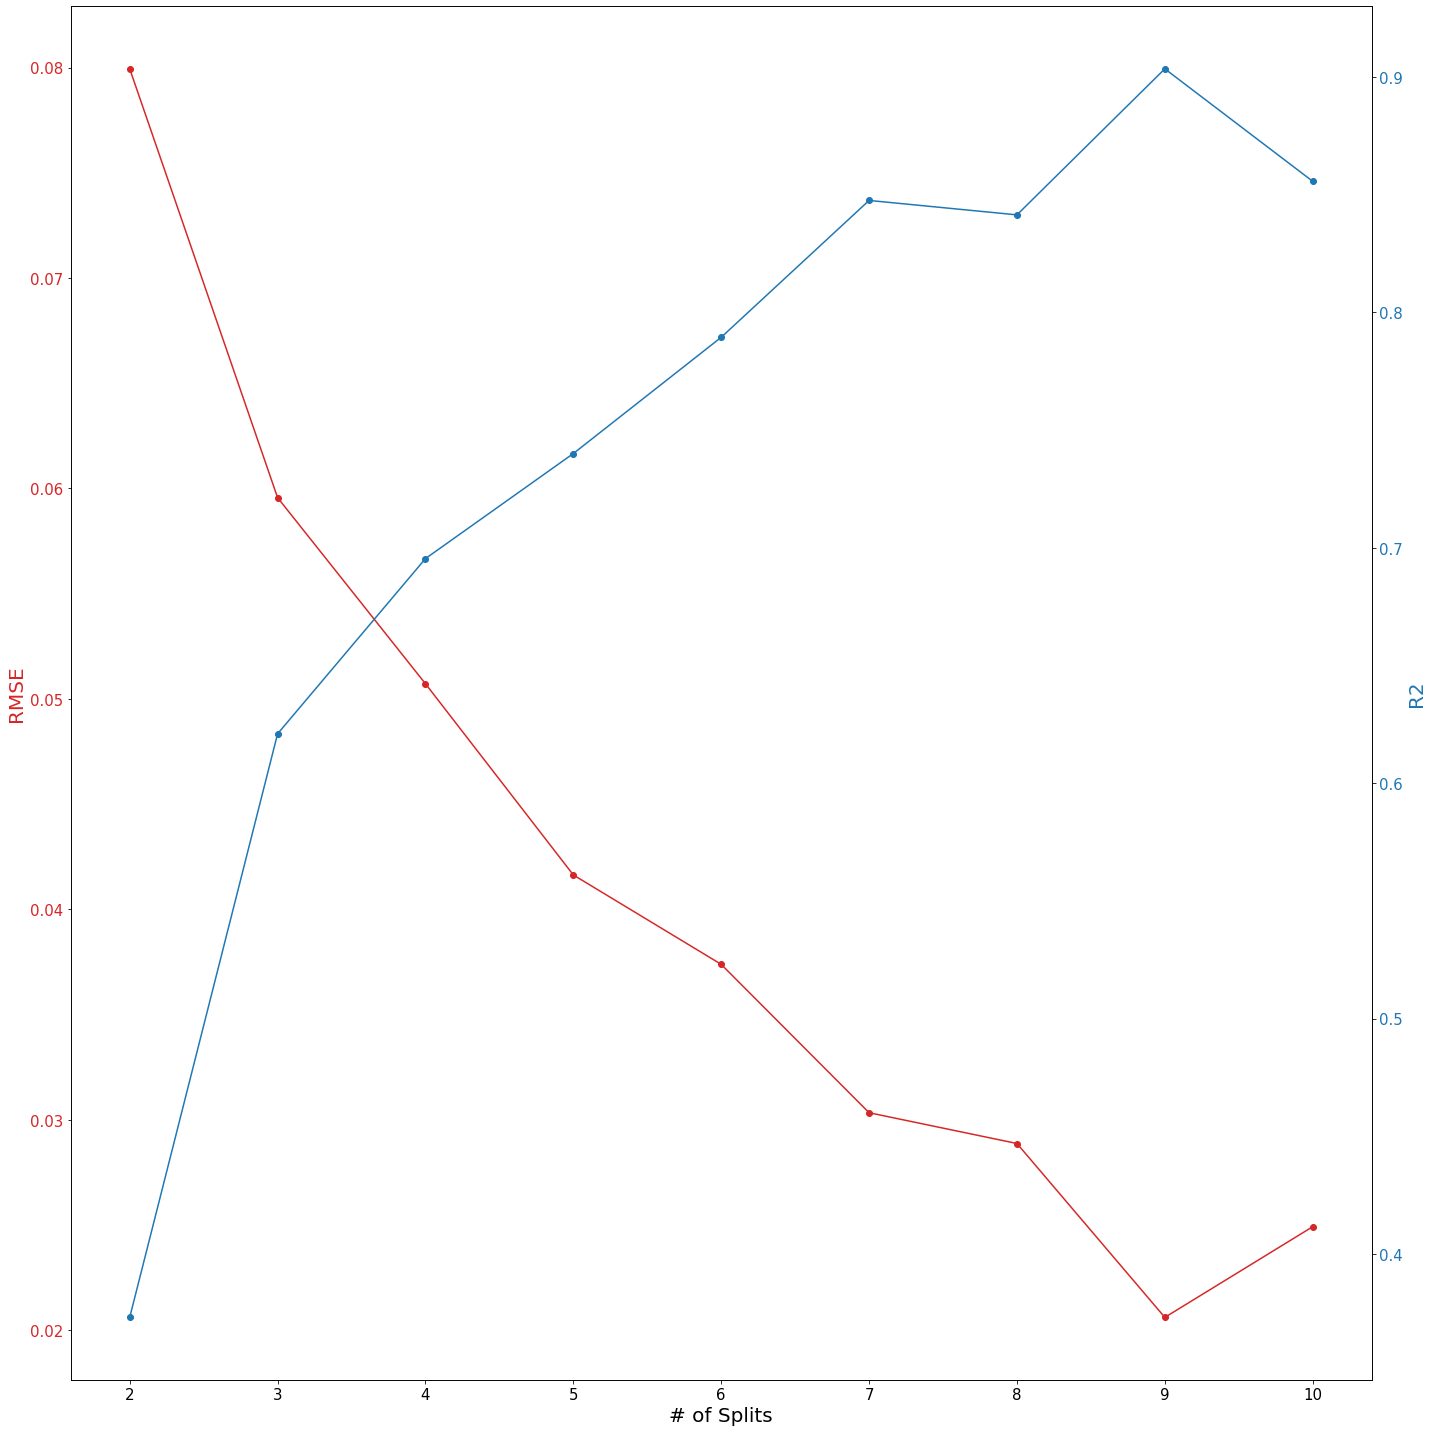

In [60]:
t = separations
data1 = rmse_results
data2 = r2_results

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('# of Splits', size = 20)
ax1.set_ylabel('RMSE', color=color, size = 20)
ax1.plot(t, data1, color=color, marker = 'o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2', color=color, size = 20)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color, marker = 'o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [61]:
from nn import train_model_rmse, train_model_mae, load_model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = 0.9, random_state = 42)

In [62]:
start = time.time()
model_history_rmse = train_model_rmse(X_train, y_train, num_cols = len(features.columns))
end = time.time()

print('Time taken to train this neural network was {} seconds'.format(int(end - start)))

Epoch 1/1600
1/1 [==============================] - ETA: 0s - loss: 0.2405
Epoch 00001: val_loss improved from inf to 0.12339, saving model to model_best_weights.h5
1/1 [==============================] - 0s 169ms/step - loss: 0.2405 - val_loss: 0.1234
Epoch 2/1600
1/1 [==============================] - ETA: 0s - loss: 0.2363
Epoch 00002: val_loss improved from 0.12339 to 0.12235, saving model to model_best_weights.h5
1/1 [==============================] - 0s 41ms/step - loss: 0.2363 - val_loss: 0.1223
Epoch 3/1600
1/1 [==============================] - ETA: 0s - loss: 0.2288
Epoch 00003: val_loss improved from 0.12235 to 0.12157, saving model to model_best_weights.h5
1/1 [==============================] - 0s 49ms/step - loss: 0.2288 - val_loss: 0.1216
Epoch 4/1600
1/1 [==============================] - ETA: 0s - loss: 0.2249
Epoch 00004: val_loss improved from 0.12157 to 0.12087, saving model to model_best_weights.h5
1/1 [==============================] - 0s 48ms/step - loss: 0.2249 - 

1/1 [==============================] - ETA: 0s - loss: 0.1902
Epoch 00033: val_loss improved from 0.10857 to 0.10804, saving model to model_best_weights.h5
1/1 [==============================] - 0s 46ms/step - loss: 0.1902 - val_loss: 0.1080
Epoch 34/1600
1/1 [==============================] - ETA: 0s - loss: 0.1914
Epoch 00034: val_loss improved from 0.10804 to 0.10677, saving model to model_best_weights.h5
1/1 [==============================] - 0s 48ms/step - loss: 0.1914 - val_loss: 0.1068
Epoch 35/1600
1/1 [==============================] - ETA: 0s - loss: 0.1913
Epoch 00035: val_loss improved from 0.10677 to 0.10585, saving model to model_best_weights.h5
1/1 [==============================] - 0s 45ms/step - loss: 0.1913 - val_loss: 0.1059
Epoch 36/1600
1/1 [==============================] - ETA: 0s - loss: 0.1853
Epoch 00036: val_loss did not improve from 0.10585
1/1 [==============================] - 0s 16ms/step - loss: 0.1853 - val_loss: 0.1062
Epoch 37/1600
1/1 [==============

1/1 [==============================] - 0s 47ms/step - loss: 0.1494 - val_loss: 0.0950
Epoch 70/1600
1/1 [==============================] - ETA: 0s - loss: 0.1499
Epoch 00070: val_loss did not improve from 0.09503
1/1 [==============================] - 0s 16ms/step - loss: 0.1499 - val_loss: 0.0955
Epoch 71/1600
1/1 [==============================] - ETA: 0s - loss: 0.1435
Epoch 00071: val_loss did not improve from 0.09503
1/1 [==============================] - 0s 16ms/step - loss: 0.1435 - val_loss: 0.0969
Epoch 72/1600
1/1 [==============================] - ETA: 0s - loss: 0.1525
Epoch 00072: val_loss improved from 0.09503 to 0.09426, saving model to model_best_weights.h5
1/1 [==============================] - 0s 49ms/step - loss: 0.1525 - val_loss: 0.0943
Epoch 73/1600
1/1 [==============================] - ETA: 0s - loss: 0.1391
Epoch 00073: val_loss did not improve from 0.09426
1/1 [==============================] - 0s 16ms/step - loss: 0.1391 - val_loss: 0.0948
Epoch 74/1600
1/1 [

Epoch 107/1600
1/1 [==============================] - ETA: 0s - loss: 0.1083
Epoch 00107: val_loss did not improve from 0.08390
1/1 [==============================] - 0s 14ms/step - loss: 0.1083 - val_loss: 0.0861
Epoch 108/1600
1/1 [==============================] - ETA: 0s - loss: 0.1010
Epoch 00108: val_loss did not improve from 0.08390
1/1 [==============================] - 0s 15ms/step - loss: 0.1010 - val_loss: 0.0873
Epoch 109/1600
1/1 [==============================] - ETA: 0s - loss: 0.1006
Epoch 00109: val_loss did not improve from 0.08390
1/1 [==============================] - 0s 16ms/step - loss: 0.1006 - val_loss: 0.0868
Epoch 110/1600
1/1 [==============================] - ETA: 0s - loss: 0.1033
Epoch 00110: val_loss did not improve from 0.08390
1/1 [==============================] - 0s 16ms/step - loss: 0.1033 - val_loss: 0.0851
Epoch 111/1600
1/1 [==============================] - ETA: 0s - loss: 0.1217
Epoch 00111: val_loss improved from 0.08390 to 0.08143, saving mode

1/1 [==============================] - ETA: 0s - loss: 0.0742
Epoch 00142: val_loss did not improve from 0.06284
1/1 [==============================] - 0s 16ms/step - loss: 0.0742 - val_loss: 0.0630
Epoch 143/1600
1/1 [==============================] - ETA: 0s - loss: 0.0765
Epoch 00143: val_loss improved from 0.06284 to 0.06255, saving model to model_best_weights.h5
1/1 [==============================] - 0s 47ms/step - loss: 0.0765 - val_loss: 0.0626
Epoch 144/1600
1/1 [==============================] - ETA: 0s - loss: 0.0770
Epoch 00144: val_loss did not improve from 0.06255
1/1 [==============================] - 0s 15ms/step - loss: 0.0770 - val_loss: 0.0629
Epoch 145/1600
1/1 [==============================] - ETA: 0s - loss: 0.0808
Epoch 00145: val_loss did not improve from 0.06255
1/1 [==============================] - 0s 16ms/step - loss: 0.0808 - val_loss: 0.0635
Epoch 146/1600
1/1 [==============================] - ETA: 0s - loss: 0.0787
Epoch 00146: val_loss did not improve f

1/1 [==============================] - ETA: 0s - loss: 0.0666
Epoch 00178: val_loss did not improve from 0.04529
1/1 [==============================] - 0s 16ms/step - loss: 0.0666 - val_loss: 0.0469
Epoch 179/1600
1/1 [==============================] - ETA: 0s - loss: 0.0716
Epoch 00179: val_loss did not improve from 0.04529
1/1 [==============================] - 0s 16ms/step - loss: 0.0716 - val_loss: 0.0519
Epoch 180/1600
1/1 [==============================] - ETA: 0s - loss: 0.0571
Epoch 00180: val_loss did not improve from 0.04529
1/1 [==============================] - 0s 16ms/step - loss: 0.0571 - val_loss: 0.0572
Epoch 181/1600
1/1 [==============================] - ETA: 0s - loss: 0.0771
Epoch 00181: val_loss did not improve from 0.04529
1/1 [==============================] - 0s 16ms/step - loss: 0.0771 - val_loss: 0.0568
Epoch 182/1600
1/1 [==============================] - ETA: 0s - loss: 0.0669
Epoch 00182: val_loss did not improve from 0.04529
1/1 [==========================

Epoch 216/1600
1/1 [==============================] - ETA: 0s - loss: 0.0563
Epoch 00216: val_loss improved from 0.04374 to 0.04274, saving model to model_best_weights.h5
1/1 [==============================] - 0s 47ms/step - loss: 0.0563 - val_loss: 0.0427
Epoch 217/1600
1/1 [==============================] - ETA: 0s - loss: 0.0602
Epoch 00217: val_loss improved from 0.04274 to 0.04169, saving model to model_best_weights.h5
1/1 [==============================] - 0s 49ms/step - loss: 0.0602 - val_loss: 0.0417
Epoch 218/1600
1/1 [==============================] - ETA: 0s - loss: 0.0618
Epoch 00218: val_loss improved from 0.04169 to 0.03950, saving model to model_best_weights.h5
1/1 [==============================] - 0s 48ms/step - loss: 0.0618 - val_loss: 0.0395
Epoch 219/1600
1/1 [==============================] - ETA: 0s - loss: 0.0600
Epoch 00219: val_loss improved from 0.03950 to 0.03661, saving model to model_best_weights.h5
1/1 [==============================] - 0s 49ms/step - loss

1/1 [==============================] - ETA: 0s - loss: 0.0588
Epoch 00253: val_loss did not improve from 0.03318
1/1 [==============================] - 0s 16ms/step - loss: 0.0588 - val_loss: 0.0516
Epoch 254/1600
1/1 [==============================] - ETA: 0s - loss: 0.0672
Epoch 00254: val_loss did not improve from 0.03318
1/1 [==============================] - 0s 16ms/step - loss: 0.0672 - val_loss: 0.0504
Epoch 255/1600
1/1 [==============================] - ETA: 0s - loss: 0.0562
Epoch 00255: val_loss did not improve from 0.03318
1/1 [==============================] - 0s 16ms/step - loss: 0.0562 - val_loss: 0.0476
Epoch 256/1600
1/1 [==============================] - ETA: 0s - loss: 0.0474
Epoch 00256: val_loss did not improve from 0.03318
1/1 [==============================] - 0s 17ms/step - loss: 0.0474 - val_loss: 0.0441
Epoch 257/1600
1/1 [==============================] - ETA: 0s - loss: 0.0746
Epoch 00257: val_loss did not improve from 0.03318
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0513
Epoch 00291: val_loss did not improve from 0.03318
1/1 [==============================] - 0s 16ms/step - loss: 0.0513 - val_loss: 0.0509
Epoch 292/1600
1/1 [==============================] - ETA: 0s - loss: 0.0563
Epoch 00292: val_loss did not improve from 0.03318
1/1 [==============================] - 0s 16ms/step - loss: 0.0563 - val_loss: 0.0479
Epoch 293/1600
1/1 [==============================] - ETA: 0s - loss: 0.0593
Epoch 00293: val_loss did not improve from 0.03318
1/1 [==============================] - 0s 16ms/step - loss: 0.0593 - val_loss: 0.0455
Epoch 294/1600
1/1 [==============================] - ETA: 0s - loss: 0.0515
Epoch 00294: val_loss did not improve from 0.03318
1/1 [==============================] - 0s 16ms/step - loss: 0.0515 - val_loss: 0.0441
Epoch 295/1600
1/1 [==============================] - ETA: 0s - loss: 0.0519
Epoch 00295: val_loss did not improve from 0.03318
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0497
Epoch 00329: val_loss did not improve from 0.03200
1/1 [==============================] - 0s 17ms/step - loss: 0.0497 - val_loss: 0.0473
Epoch 330/1600
1/1 [==============================] - ETA: 0s - loss: 0.0460
Epoch 00330: val_loss did not improve from 0.03200
1/1 [==============================] - 0s 18ms/step - loss: 0.0460 - val_loss: 0.0490
Epoch 331/1600
1/1 [==============================] - ETA: 0s - loss: 0.0565
Epoch 00331: val_loss did not improve from 0.03200
1/1 [==============================] - 0s 17ms/step - loss: 0.0565 - val_loss: 0.0495
Epoch 332/1600
1/1 [==============================] - ETA: 0s - loss: 0.0505
Epoch 00332: val_loss did not improve from 0.03200
1/1 [==============================] - 0s 18ms/step - loss: 0.0505 - val_loss: 0.0488
Epoch 333/1600
1/1 [==============================] - ETA: 0s - loss: 0.0493
Epoch 00333: val_loss did not improve from 0.03200
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0542
Epoch 00367: val_loss did not improve from 0.03200
1/1 [==============================] - 0s 16ms/step - loss: 0.0542 - val_loss: 0.0438
Epoch 368/1600
1/1 [==============================] - ETA: 0s - loss: 0.0465
Epoch 00368: val_loss did not improve from 0.03200
1/1 [==============================] - 0s 17ms/step - loss: 0.0465 - val_loss: 0.0430
Epoch 369/1600
1/1 [==============================] - ETA: 0s - loss: 0.0450
Epoch 00369: val_loss did not improve from 0.03200
1/1 [==============================] - 0s 17ms/step - loss: 0.0450 - val_loss: 0.0421
Epoch 370/1600
1/1 [==============================] - ETA: 0s - loss: 0.0640
Epoch 00370: val_loss did not improve from 0.03200
1/1 [==============================] - 0s 16ms/step - loss: 0.0640 - val_loss: 0.0400
Epoch 371/1600
1/1 [==============================] - ETA: 0s - loss: 0.0627
Epoch 00371: val_loss did not improve from 0.03200
1/1 [==========================

Epoch 405/1600
1/1 [==============================] - ETA: 0s - loss: 0.0550
Epoch 00405: val_loss did not improve from 0.02921
1/1 [==============================] - 0s 16ms/step - loss: 0.0550 - val_loss: 0.0403
Epoch 406/1600
1/1 [==============================] - ETA: 0s - loss: 0.0393
Epoch 00406: val_loss did not improve from 0.02921
1/1 [==============================] - 0s 16ms/step - loss: 0.0393 - val_loss: 0.0397
Epoch 407/1600
1/1 [==============================] - ETA: 0s - loss: 0.0582
Epoch 00407: val_loss did not improve from 0.02921
1/1 [==============================] - 0s 16ms/step - loss: 0.0582 - val_loss: 0.0493
Epoch 408/1600
1/1 [==============================] - ETA: 0s - loss: 0.0460
Epoch 00408: val_loss did not improve from 0.02921
1/1 [==============================] - 0s 17ms/step - loss: 0.0460 - val_loss: 0.0540
Epoch 409/1600
1/1 [==============================] - ETA: 0s - loss: 0.0494
Epoch 00409: val_loss did not improve from 0.02921
1/1 [===========

1/1 [==============================] - ETA: 0s - loss: 0.0571
Epoch 00443: val_loss did not improve from 0.02921
1/1 [==============================] - 0s 17ms/step - loss: 0.0571 - val_loss: 0.0447
Epoch 444/1600
1/1 [==============================] - ETA: 0s - loss: 0.0519
Epoch 00444: val_loss did not improve from 0.02921
1/1 [==============================] - 0s 16ms/step - loss: 0.0519 - val_loss: 0.0463
Epoch 445/1600
1/1 [==============================] - ETA: 0s - loss: 0.0554
Epoch 00445: val_loss did not improve from 0.02921
1/1 [==============================] - 0s 16ms/step - loss: 0.0554 - val_loss: 0.0480
Epoch 446/1600
1/1 [==============================] - ETA: 0s - loss: 0.0566
Epoch 00446: val_loss did not improve from 0.02921
1/1 [==============================] - 0s 17ms/step - loss: 0.0566 - val_loss: 0.0487
Epoch 447/1600
1/1 [==============================] - ETA: 0s - loss: 0.0503
Epoch 00447: val_loss did not improve from 0.02921
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0581
Epoch 00481: val_loss did not improve from 0.02921
1/1 [==============================] - 0s 16ms/step - loss: 0.0581 - val_loss: 0.0474
Epoch 482/1600
1/1 [==============================] - ETA: 0s - loss: 0.0526
Epoch 00482: val_loss did not improve from 0.02921
1/1 [==============================] - 0s 16ms/step - loss: 0.0526 - val_loss: 0.0472
Epoch 483/1600
1/1 [==============================] - ETA: 0s - loss: 0.0574
Epoch 00483: val_loss did not improve from 0.02921
1/1 [==============================] - 0s 16ms/step - loss: 0.0574 - val_loss: 0.0468
Epoch 484/1600
1/1 [==============================] - ETA: 0s - loss: 0.0586
Epoch 00484: val_loss did not improve from 0.02921
1/1 [==============================] - 0s 16ms/step - loss: 0.0586 - val_loss: 0.0481
Epoch 485/1600
1/1 [==============================] - ETA: 0s - loss: 0.0530
Epoch 00485: val_loss did not improve from 0.02921
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0689
Epoch 00519: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 16ms/step - loss: 0.0689 - val_loss: 0.0587
Epoch 520/1600
1/1 [==============================] - ETA: 0s - loss: 0.0460
Epoch 00520: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 16ms/step - loss: 0.0460 - val_loss: 0.0568
Epoch 521/1600
1/1 [==============================] - ETA: 0s - loss: 0.0512
Epoch 00521: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 17ms/step - loss: 0.0512 - val_loss: 0.0569
Epoch 522/1600
1/1 [==============================] - ETA: 0s - loss: 0.0546
Epoch 00522: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 16ms/step - loss: 0.0546 - val_loss: 0.0560
Epoch 523/1600
1/1 [==============================] - ETA: 0s - loss: 0.0536
Epoch 00523: val_loss did not improve from 0.02442
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0440
Epoch 00557: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 16ms/step - loss: 0.0440 - val_loss: 0.0396
Epoch 558/1600
1/1 [==============================] - ETA: 0s - loss: 0.0509
Epoch 00558: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 16ms/step - loss: 0.0509 - val_loss: 0.0385
Epoch 559/1600
1/1 [==============================] - ETA: 0s - loss: 0.0586
Epoch 00559: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 16ms/step - loss: 0.0586 - val_loss: 0.0405
Epoch 560/1600
1/1 [==============================] - ETA: 0s - loss: 0.0417
Epoch 00560: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 15ms/step - loss: 0.0417 - val_loss: 0.0394
Epoch 561/1600
1/1 [==============================] - ETA: 0s - loss: 0.0484
Epoch 00561: val_loss did not improve from 0.02442
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0466
Epoch 00595: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 15ms/step - loss: 0.0466 - val_loss: 0.0358
Epoch 596/1600
1/1 [==============================] - ETA: 0s - loss: 0.0449
Epoch 00596: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 15ms/step - loss: 0.0449 - val_loss: 0.0370
Epoch 597/1600
1/1 [==============================] - ETA: 0s - loss: 0.0470
Epoch 00597: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 15ms/step - loss: 0.0470 - val_loss: 0.0376
Epoch 598/1600
1/1 [==============================] - ETA: 0s - loss: 0.0408
Epoch 00598: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 15ms/step - loss: 0.0408 - val_loss: 0.0390
Epoch 599/1600
1/1 [==============================] - ETA: 0s - loss: 0.0494
Epoch 00599: val_loss did not improve from 0.02442
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0404
Epoch 00633: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 15ms/step - loss: 0.0404 - val_loss: 0.0446
Epoch 634/1600
1/1 [==============================] - ETA: 0s - loss: 0.0424
Epoch 00634: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 15ms/step - loss: 0.0424 - val_loss: 0.0426
Epoch 635/1600
1/1 [==============================] - ETA: 0s - loss: 0.0466
Epoch 00635: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 16ms/step - loss: 0.0466 - val_loss: 0.0424
Epoch 636/1600
1/1 [==============================] - ETA: 0s - loss: 0.0673
Epoch 00636: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 16ms/step - loss: 0.0673 - val_loss: 0.0426
Epoch 637/1600
1/1 [==============================] - ETA: 0s - loss: 0.0426
Epoch 00637: val_loss did not improve from 0.02442
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0543
Epoch 00671: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 15ms/step - loss: 0.0543 - val_loss: 0.0418
Epoch 672/1600
1/1 [==============================] - ETA: 0s - loss: 0.0506
Epoch 00672: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 15ms/step - loss: 0.0506 - val_loss: 0.0427
Epoch 673/1600
1/1 [==============================] - ETA: 0s - loss: 0.0573
Epoch 00673: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 15ms/step - loss: 0.0573 - val_loss: 0.0417
Epoch 674/1600
1/1 [==============================] - ETA: 0s - loss: 0.0547
Epoch 00674: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 15ms/step - loss: 0.0547 - val_loss: 0.0442
Epoch 675/1600
1/1 [==============================] - ETA: 0s - loss: 0.0487
Epoch 00675: val_loss did not improve from 0.02442
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0499
Epoch 00709: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 16ms/step - loss: 0.0499 - val_loss: 0.0287
Epoch 710/1600
1/1 [==============================] - ETA: 0s - loss: 0.0502
Epoch 00710: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 16ms/step - loss: 0.0502 - val_loss: 0.0272
Epoch 711/1600
1/1 [==============================] - ETA: 0s - loss: 0.0479
Epoch 00711: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 15ms/step - loss: 0.0479 - val_loss: 0.0296
Epoch 712/1600
1/1 [==============================] - ETA: 0s - loss: 0.0559
Epoch 00712: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 15ms/step - loss: 0.0559 - val_loss: 0.0300
Epoch 713/1600
1/1 [==============================] - ETA: 0s - loss: 0.0522
Epoch 00713: val_loss did not improve from 0.02442
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0420
Epoch 00747: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 16ms/step - loss: 0.0420 - val_loss: 0.0434
Epoch 748/1600
1/1 [==============================] - ETA: 0s - loss: 0.0441
Epoch 00748: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 15ms/step - loss: 0.0441 - val_loss: 0.0431
Epoch 749/1600
1/1 [==============================] - ETA: 0s - loss: 0.0522
Epoch 00749: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 15ms/step - loss: 0.0522 - val_loss: 0.0391
Epoch 750/1600
1/1 [==============================] - ETA: 0s - loss: 0.0549
Epoch 00750: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 16ms/step - loss: 0.0549 - val_loss: 0.0371
Epoch 751/1600
1/1 [==============================] - ETA: 0s - loss: 0.0463
Epoch 00751: val_loss did not improve from 0.02442
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0462
Epoch 00785: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 15ms/step - loss: 0.0462 - val_loss: 0.0346
Epoch 786/1600
1/1 [==============================] - ETA: 0s - loss: 0.0407
Epoch 00786: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 15ms/step - loss: 0.0407 - val_loss: 0.0374
Epoch 787/1600
1/1 [==============================] - ETA: 0s - loss: 0.0494
Epoch 00787: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 15ms/step - loss: 0.0494 - val_loss: 0.0384
Epoch 788/1600
1/1 [==============================] - ETA: 0s - loss: 0.0551
Epoch 00788: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 15ms/step - loss: 0.0551 - val_loss: 0.0386
Epoch 789/1600
1/1 [==============================] - ETA: 0s - loss: 0.0487
Epoch 00789: val_loss did not improve from 0.02442
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0498
Epoch 00823: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 15ms/step - loss: 0.0498 - val_loss: 0.0409
Epoch 824/1600
1/1 [==============================] - ETA: 0s - loss: 0.0501
Epoch 00824: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 15ms/step - loss: 0.0501 - val_loss: 0.0406
Epoch 825/1600
1/1 [==============================] - ETA: 0s - loss: 0.0435
Epoch 00825: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 15ms/step - loss: 0.0435 - val_loss: 0.0400
Epoch 826/1600
1/1 [==============================] - ETA: 0s - loss: 0.0457
Epoch 00826: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 15ms/step - loss: 0.0457 - val_loss: 0.0399
Epoch 827/1600
1/1 [==============================] - ETA: 0s - loss: 0.0456
Epoch 00827: val_loss did not improve from 0.02442
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0473
Epoch 00861: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 15ms/step - loss: 0.0473 - val_loss: 0.0469
Epoch 862/1600
1/1 [==============================] - ETA: 0s - loss: 0.0464
Epoch 00862: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 15ms/step - loss: 0.0464 - val_loss: 0.0467
Epoch 863/1600
1/1 [==============================] - ETA: 0s - loss: 0.0461
Epoch 00863: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 15ms/step - loss: 0.0461 - val_loss: 0.0455
Epoch 864/1600
1/1 [==============================] - ETA: 0s - loss: 0.0516
Epoch 00864: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 15ms/step - loss: 0.0516 - val_loss: 0.0476
Epoch 865/1600
1/1 [==============================] - ETA: 0s - loss: 0.0509
Epoch 00865: val_loss did not improve from 0.02442
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0415
Epoch 00899: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 15ms/step - loss: 0.0415 - val_loss: 0.0292
Epoch 900/1600
1/1 [==============================] - ETA: 0s - loss: 0.0557
Epoch 00900: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 15ms/step - loss: 0.0557 - val_loss: 0.0299
Epoch 901/1600
1/1 [==============================] - ETA: 0s - loss: 0.0589
Epoch 00901: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 15ms/step - loss: 0.0589 - val_loss: 0.0317
Epoch 902/1600
1/1 [==============================] - ETA: 0s - loss: 0.0355
Epoch 00902: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 15ms/step - loss: 0.0355 - val_loss: 0.0368
Epoch 903/1600
1/1 [==============================] - ETA: 0s - loss: 0.0520
Epoch 00903: val_loss did not improve from 0.02442
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0562
Epoch 00937: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 16ms/step - loss: 0.0562 - val_loss: 0.0389
Epoch 938/1600
1/1 [==============================] - ETA: 0s - loss: 0.0435
Epoch 00938: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 15ms/step - loss: 0.0435 - val_loss: 0.0393
Epoch 939/1600
1/1 [==============================] - ETA: 0s - loss: 0.0474
Epoch 00939: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 15ms/step - loss: 0.0474 - val_loss: 0.0376
Epoch 940/1600
1/1 [==============================] - ETA: 0s - loss: 0.0448
Epoch 00940: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 16ms/step - loss: 0.0448 - val_loss: 0.0385
Epoch 941/1600
1/1 [==============================] - ETA: 0s - loss: 0.0489
Epoch 00941: val_loss did not improve from 0.02442
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0520
Epoch 00975: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 16ms/step - loss: 0.0520 - val_loss: 0.0353
Epoch 976/1600
1/1 [==============================] - ETA: 0s - loss: 0.0570
Epoch 00976: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 16ms/step - loss: 0.0570 - val_loss: 0.0340
Epoch 977/1600
1/1 [==============================] - ETA: 0s - loss: 0.0427
Epoch 00977: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 17ms/step - loss: 0.0427 - val_loss: 0.0337
Epoch 978/1600
1/1 [==============================] - ETA: 0s - loss: 0.0511
Epoch 00978: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 16ms/step - loss: 0.0511 - val_loss: 0.0393
Epoch 979/1600
1/1 [==============================] - ETA: 0s - loss: 0.0494
Epoch 00979: val_loss did not improve from 0.02442
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0479
Epoch 01013: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 16ms/step - loss: 0.0479 - val_loss: 0.0291
Epoch 1014/1600
1/1 [==============================] - ETA: 0s - loss: 0.0507
Epoch 01014: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 16ms/step - loss: 0.0507 - val_loss: 0.0257
Epoch 1015/1600
1/1 [==============================] - ETA: 0s - loss: 0.0455
Epoch 01015: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 16ms/step - loss: 0.0455 - val_loss: 0.0269
Epoch 1016/1600
1/1 [==============================] - ETA: 0s - loss: 0.0485
Epoch 01016: val_loss did not improve from 0.02442
1/1 [==============================] - 0s 16ms/step - loss: 0.0485 - val_loss: 0.0275
Epoch 1017/1600
1/1 [==============================] - ETA: 0s - loss: 0.0478
Epoch 01017: val_loss did not improve from 0.02442
1/1 [======================

Epoch 1051/1600
1/1 [==============================] - ETA: 0s - loss: 0.0464
Epoch 01051: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0464 - val_loss: 0.0356
Epoch 1052/1600
1/1 [==============================] - ETA: 0s - loss: 0.0470
Epoch 01052: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 15ms/step - loss: 0.0470 - val_loss: 0.0342
Epoch 1053/1600
1/1 [==============================] - ETA: 0s - loss: 0.0503
Epoch 01053: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0503 - val_loss: 0.0318
Epoch 1054/1600
1/1 [==============================] - ETA: 0s - loss: 0.0520
Epoch 01054: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0520 - val_loss: 0.0346
Epoch 1055/1600
1/1 [==============================] - ETA: 0s - loss: 0.0462
Epoch 01055: val_loss did not improve from 0.02415
1/1 [======

1/1 [==============================] - ETA: 0s - loss: 0.0385
Epoch 01089: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0385 - val_loss: 0.0361
Epoch 1090/1600
1/1 [==============================] - ETA: 0s - loss: 0.0602
Epoch 01090: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0602 - val_loss: 0.0364
Epoch 1091/1600
1/1 [==============================] - ETA: 0s - loss: 0.0393
Epoch 01091: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0393 - val_loss: 0.0368
Epoch 1092/1600
1/1 [==============================] - ETA: 0s - loss: 0.0483
Epoch 01092: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0483 - val_loss: 0.0365
Epoch 1093/1600
1/1 [==============================] - ETA: 0s - loss: 0.0534
Epoch 01093: val_loss did not improve from 0.02415
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0466
Epoch 01127: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0466 - val_loss: 0.0335
Epoch 1128/1600
1/1 [==============================] - ETA: 0s - loss: 0.0472
Epoch 01128: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 17ms/step - loss: 0.0472 - val_loss: 0.0353
Epoch 1129/1600
1/1 [==============================] - ETA: 0s - loss: 0.0492
Epoch 01129: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0492 - val_loss: 0.0363
Epoch 1130/1600
1/1 [==============================] - ETA: 0s - loss: 0.0401
Epoch 01130: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 17ms/step - loss: 0.0401 - val_loss: 0.0371
Epoch 1131/1600
1/1 [==============================] - ETA: 0s - loss: 0.0491
Epoch 01131: val_loss did not improve from 0.02415
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0458
Epoch 01165: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0458 - val_loss: 0.0411
Epoch 1166/1600
1/1 [==============================] - ETA: 0s - loss: 0.0611
Epoch 01166: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0611 - val_loss: 0.0423
Epoch 1167/1600
1/1 [==============================] - ETA: 0s - loss: 0.0458
Epoch 01167: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0458 - val_loss: 0.0425
Epoch 1168/1600
1/1 [==============================] - ETA: 0s - loss: 0.0392
Epoch 01168: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0392 - val_loss: 0.0411
Epoch 1169/1600
1/1 [==============================] - ETA: 0s - loss: 0.0554
Epoch 01169: val_loss did not improve from 0.02415
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0431
Epoch 01203: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0431 - val_loss: 0.0426
Epoch 1204/1600
1/1 [==============================] - ETA: 0s - loss: 0.0484
Epoch 01204: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0484 - val_loss: 0.0443
Epoch 1205/1600
1/1 [==============================] - ETA: 0s - loss: 0.0455
Epoch 01205: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 17ms/step - loss: 0.0455 - val_loss: 0.0481
Epoch 1206/1600
1/1 [==============================] - ETA: 0s - loss: 0.0484
Epoch 01206: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0484 - val_loss: 0.0427
Epoch 1207/1600
1/1 [==============================] - ETA: 0s - loss: 0.0564
Epoch 01207: val_loss did not improve from 0.02415
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0488
Epoch 01241: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0488 - val_loss: 0.0403
Epoch 1242/1600
1/1 [==============================] - ETA: 0s - loss: 0.0554
Epoch 01242: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0554 - val_loss: 0.0397
Epoch 1243/1600
1/1 [==============================] - ETA: 0s - loss: 0.0387
Epoch 01243: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0387 - val_loss: 0.0397
Epoch 1244/1600
1/1 [==============================] - ETA: 0s - loss: 0.0499
Epoch 01244: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0499 - val_loss: 0.0389
Epoch 1245/1600
1/1 [==============================] - ETA: 0s - loss: 0.0435
Epoch 01245: val_loss did not improve from 0.02415
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0473
Epoch 01279: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0473 - val_loss: 0.0388
Epoch 1280/1600
1/1 [==============================] - ETA: 0s - loss: 0.0568
Epoch 01280: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0568 - val_loss: 0.0387
Epoch 1281/1600
1/1 [==============================] - ETA: 0s - loss: 0.0483
Epoch 01281: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0483 - val_loss: 0.0381
Epoch 1282/1600
1/1 [==============================] - ETA: 0s - loss: 0.0525
Epoch 01282: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0525 - val_loss: 0.0382
Epoch 1283/1600
1/1 [==============================] - ETA: 0s - loss: 0.0399
Epoch 01283: val_loss did not improve from 0.02415
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0439
Epoch 01317: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0439 - val_loss: 0.0353
Epoch 1318/1600
1/1 [==============================] - ETA: 0s - loss: 0.0439
Epoch 01318: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0439 - val_loss: 0.0350
Epoch 1319/1600
1/1 [==============================] - ETA: 0s - loss: 0.0487
Epoch 01319: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0487 - val_loss: 0.0370
Epoch 1320/1600
1/1 [==============================] - ETA: 0s - loss: 0.0408
Epoch 01320: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 17ms/step - loss: 0.0408 - val_loss: 0.0365
Epoch 1321/1600
1/1 [==============================] - ETA: 0s - loss: 0.0420
Epoch 01321: val_loss did not improve from 0.02415
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0527
Epoch 01355: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0527 - val_loss: 0.0771
Epoch 1356/1600
1/1 [==============================] - ETA: 0s - loss: 0.0553
Epoch 01356: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 17ms/step - loss: 0.0553 - val_loss: 0.0762
Epoch 1357/1600
1/1 [==============================] - ETA: 0s - loss: 0.0561
Epoch 01357: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0561 - val_loss: 0.0707
Epoch 1358/1600
1/1 [==============================] - ETA: 0s - loss: 0.0507
Epoch 01358: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 17ms/step - loss: 0.0507 - val_loss: 0.0675
Epoch 1359/1600
1/1 [==============================] - ETA: 0s - loss: 0.0534
Epoch 01359: val_loss did not improve from 0.02415
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0532
Epoch 01393: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0532 - val_loss: 0.0408
Epoch 1394/1600
1/1 [==============================] - ETA: 0s - loss: 0.0537
Epoch 01394: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0537 - val_loss: 0.0411
Epoch 1395/1600
1/1 [==============================] - ETA: 0s - loss: 0.0533
Epoch 01395: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 17ms/step - loss: 0.0533 - val_loss: 0.0413
Epoch 1396/1600
1/1 [==============================] - ETA: 0s - loss: 0.0559
Epoch 01396: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0559 - val_loss: 0.0399
Epoch 1397/1600
1/1 [==============================] - ETA: 0s - loss: 0.0535
Epoch 01397: val_loss did not improve from 0.02415
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0500
Epoch 01431: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0500 - val_loss: 0.0475
Epoch 1432/1600
1/1 [==============================] - ETA: 0s - loss: 0.0531
Epoch 01432: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0531 - val_loss: 0.0488
Epoch 1433/1600
1/1 [==============================] - ETA: 0s - loss: 0.0532
Epoch 01433: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0532 - val_loss: 0.0503
Epoch 1434/1600
1/1 [==============================] - ETA: 0s - loss: 0.0477
Epoch 01434: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0477 - val_loss: 0.0553
Epoch 1435/1600
1/1 [==============================] - ETA: 0s - loss: 0.0589
Epoch 01435: val_loss did not improve from 0.02415
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0556
Epoch 01469: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0556 - val_loss: 0.0400
Epoch 1470/1600
1/1 [==============================] - ETA: 0s - loss: 0.0439
Epoch 01470: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0439 - val_loss: 0.0412
Epoch 1471/1600
1/1 [==============================] - ETA: 0s - loss: 0.0421
Epoch 01471: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0421 - val_loss: 0.0392
Epoch 1472/1600
1/1 [==============================] - ETA: 0s - loss: 0.0573
Epoch 01472: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0573 - val_loss: 0.0415
Epoch 1473/1600
1/1 [==============================] - ETA: 0s - loss: 0.0612
Epoch 01473: val_loss did not improve from 0.02415
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0474
Epoch 01507: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0474 - val_loss: 0.0361
Epoch 1508/1600
1/1 [==============================] - ETA: 0s - loss: 0.0534
Epoch 01508: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0534 - val_loss: 0.0327
Epoch 1509/1600
1/1 [==============================] - ETA: 0s - loss: 0.0478
Epoch 01509: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 17ms/step - loss: 0.0478 - val_loss: 0.0331
Epoch 1510/1600
1/1 [==============================] - ETA: 0s - loss: 0.0451
Epoch 01510: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0451 - val_loss: 0.0350
Epoch 1511/1600
1/1 [==============================] - ETA: 0s - loss: 0.0386
Epoch 01511: val_loss did not improve from 0.02415
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0536
Epoch 01545: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0536 - val_loss: 0.0399
Epoch 1546/1600
1/1 [==============================] - ETA: 0s - loss: 0.0546
Epoch 01546: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0546 - val_loss: 0.0432
Epoch 1547/1600
1/1 [==============================] - ETA: 0s - loss: 0.0490
Epoch 01547: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0490 - val_loss: 0.0447
Epoch 1548/1600
1/1 [==============================] - ETA: 0s - loss: 0.0439
Epoch 01548: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0439 - val_loss: 0.0442
Epoch 1549/1600
1/1 [==============================] - ETA: 0s - loss: 0.0615
Epoch 01549: val_loss did not improve from 0.02415
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0528
Epoch 01583: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0528 - val_loss: 0.0414
Epoch 1584/1600
1/1 [==============================] - ETA: 0s - loss: 0.0439
Epoch 01584: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0439 - val_loss: 0.0422
Epoch 1585/1600
1/1 [==============================] - ETA: 0s - loss: 0.0391
Epoch 01585: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 16ms/step - loss: 0.0391 - val_loss: 0.0407
Epoch 1586/1600
1/1 [==============================] - ETA: 0s - loss: 0.0568
Epoch 01586: val_loss did not improve from 0.02415
1/1 [==============================] - 0s 17ms/step - loss: 0.0568 - val_loss: 0.0396
Epoch 1587/1600
1/1 [==============================] - ETA: 0s - loss: 0.0517
Epoch 01587: val_loss did not improve from 0.02415
1/1 [======================

In [63]:
nn_RMSE = min(model_history_rmse.history['val_loss'])

In [64]:
start = time.time()
model_history_mae = train_model_mae(X_train, y_train, num_cols = len(features.columns))
end = time.time()

print('Time taken to train this neural network was {} seconds'.format(int(end - start)))

Epoch 1/1600
1/1 [==============================] - ETA: 0s - loss: 0.2137
Epoch 00001: val_loss improved from inf to 0.10625, saving model to model_best_weights_mae.h5
1/1 [==============================] - 0s 132ms/step - loss: 0.2137 - val_loss: 0.1062
Epoch 2/1600
1/1 [==============================] - ETA: 0s - loss: 0.2051
Epoch 00002: val_loss improved from 0.10625 to 0.10504, saving model to model_best_weights_mae.h5
1/1 [==============================] - 0s 40ms/step - loss: 0.2051 - val_loss: 0.1050
Epoch 3/1600
1/1 [==============================] - ETA: 0s - loss: 0.2039
Epoch 00003: val_loss improved from 0.10504 to 0.10420, saving model to model_best_weights_mae.h5
1/1 [==============================] - 0s 48ms/step - loss: 0.2039 - val_loss: 0.1042
Epoch 4/1600
1/1 [==============================] - ETA: 0s - loss: 0.2033
Epoch 00004: val_loss improved from 0.10420 to 0.10342, saving model to model_best_weights_mae.h5
1/1 [==============================] - 0s 51ms/step -

Epoch 34/1600
1/1 [==============================] - ETA: 0s - loss: 0.1685
Epoch 00034: val_loss improved from 0.08827 to 0.08386, saving model to model_best_weights_mae.h5
1/1 [==============================] - 0s 49ms/step - loss: 0.1685 - val_loss: 0.0839
Epoch 35/1600
1/1 [==============================] - ETA: 0s - loss: 0.1722
Epoch 00035: val_loss improved from 0.08386 to 0.08057, saving model to model_best_weights_mae.h5
1/1 [==============================] - 0s 49ms/step - loss: 0.1722 - val_loss: 0.0806
Epoch 36/1600
1/1 [==============================] - ETA: 0s - loss: 0.1659
Epoch 00036: val_loss did not improve from 0.08057
1/1 [==============================] - 0s 17ms/step - loss: 0.1659 - val_loss: 0.0817
Epoch 37/1600
1/1 [==============================] - ETA: 0s - loss: 0.1669
Epoch 00037: val_loss improved from 0.08057 to 0.07961, saving model to model_best_weights_mae.h5
1/1 [==============================] - 0s 52ms/step - loss: 0.1669 - val_loss: 0.0796
Epoch 3

Epoch 69/1600
1/1 [==============================] - ETA: 0s - loss: 0.1269
Epoch 00069: val_loss did not improve from 0.06466
1/1 [==============================] - 0s 16ms/step - loss: 0.1269 - val_loss: 0.0688
Epoch 70/1600
1/1 [==============================] - ETA: 0s - loss: 0.1301
Epoch 00070: val_loss did not improve from 0.06466
1/1 [==============================] - 0s 16ms/step - loss: 0.1301 - val_loss: 0.0730
Epoch 71/1600
1/1 [==============================] - ETA: 0s - loss: 0.1300
Epoch 00071: val_loss did not improve from 0.06466
1/1 [==============================] - 0s 16ms/step - loss: 0.1300 - val_loss: 0.0757
Epoch 72/1600
1/1 [==============================] - ETA: 0s - loss: 0.1239
Epoch 00072: val_loss did not improve from 0.06466
1/1 [==============================] - 0s 16ms/step - loss: 0.1239 - val_loss: 0.0790
Epoch 73/1600
1/1 [==============================] - ETA: 0s - loss: 0.1276
Epoch 00073: val_loss did not improve from 0.06466
1/1 [================

1/1 [==============================] - ETA: 0s - loss: 0.0881
Epoch 00105: val_loss did not improve from 0.04512
1/1 [==============================] - 0s 16ms/step - loss: 0.0881 - val_loss: 0.0528
Epoch 106/1600
1/1 [==============================] - ETA: 0s - loss: 0.0931
Epoch 00106: val_loss did not improve from 0.04512
1/1 [==============================] - 0s 16ms/step - loss: 0.0931 - val_loss: 0.0523
Epoch 107/1600
1/1 [==============================] - ETA: 0s - loss: 0.0877
Epoch 00107: val_loss did not improve from 0.04512
1/1 [==============================] - 0s 17ms/step - loss: 0.0877 - val_loss: 0.0509
Epoch 108/1600
1/1 [==============================] - ETA: 0s - loss: 0.0801
Epoch 00108: val_loss did not improve from 0.04512
1/1 [==============================] - 0s 17ms/step - loss: 0.0801 - val_loss: 0.0502
Epoch 109/1600
1/1 [==============================] - ETA: 0s - loss: 0.0935
Epoch 00109: val_loss did not improve from 0.04512
1/1 [==========================

Epoch 143/1600
1/1 [==============================] - ETA: 0s - loss: 0.0632
Epoch 00143: val_loss did not improve from 0.03709
1/1 [==============================] - 0s 17ms/step - loss: 0.0632 - val_loss: 0.0567
Epoch 144/1600
1/1 [==============================] - ETA: 0s - loss: 0.0728
Epoch 00144: val_loss did not improve from 0.03709
1/1 [==============================] - 0s 17ms/step - loss: 0.0728 - val_loss: 0.0554
Epoch 145/1600
1/1 [==============================] - ETA: 0s - loss: 0.0667
Epoch 00145: val_loss did not improve from 0.03709
1/1 [==============================] - 0s 17ms/step - loss: 0.0667 - val_loss: 0.0553
Epoch 146/1600
1/1 [==============================] - ETA: 0s - loss: 0.0787
Epoch 00146: val_loss did not improve from 0.03709
1/1 [==============================] - 0s 17ms/step - loss: 0.0787 - val_loss: 0.0540
Epoch 147/1600
1/1 [==============================] - ETA: 0s - loss: 0.0681
Epoch 00147: val_loss did not improve from 0.03709
1/1 [===========

1/1 [==============================] - ETA: 0s - loss: 0.0585
Epoch 00181: val_loss did not improve from 0.03709
1/1 [==============================] - 0s 18ms/step - loss: 0.0585 - val_loss: 0.0471
Epoch 182/1600
1/1 [==============================] - ETA: 0s - loss: 0.0485
Epoch 00182: val_loss did not improve from 0.03709
1/1 [==============================] - 0s 17ms/step - loss: 0.0485 - val_loss: 0.0462
Epoch 183/1600
1/1 [==============================] - ETA: 0s - loss: 0.0628
Epoch 00183: val_loss did not improve from 0.03709
1/1 [==============================] - 0s 17ms/step - loss: 0.0628 - val_loss: 0.0464
Epoch 184/1600
1/1 [==============================] - ETA: 0s - loss: 0.0553
Epoch 00184: val_loss did not improve from 0.03709
1/1 [==============================] - 0s 17ms/step - loss: 0.0553 - val_loss: 0.0480
Epoch 185/1600
1/1 [==============================] - ETA: 0s - loss: 0.0491
Epoch 00185: val_loss did not improve from 0.03709
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0493
Epoch 00219: val_loss did not improve from 0.03709
1/1 [==============================] - 0s 16ms/step - loss: 0.0493 - val_loss: 0.0486
Epoch 220/1600
1/1 [==============================] - ETA: 0s - loss: 0.0572
Epoch 00220: val_loss did not improve from 0.03709
1/1 [==============================] - 0s 17ms/step - loss: 0.0572 - val_loss: 0.0471
Epoch 221/1600
1/1 [==============================] - ETA: 0s - loss: 0.0560
Epoch 00221: val_loss did not improve from 0.03709
1/1 [==============================] - 0s 16ms/step - loss: 0.0560 - val_loss: 0.0476
Epoch 222/1600
1/1 [==============================] - ETA: 0s - loss: 0.0525
Epoch 00222: val_loss did not improve from 0.03709
1/1 [==============================] - 0s 18ms/step - loss: 0.0525 - val_loss: 0.0497
Epoch 223/1600
1/1 [==============================] - ETA: 0s - loss: 0.0444
Epoch 00223: val_loss did not improve from 0.03709
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0373
Epoch 00257: val_loss did not improve from 0.03709
1/1 [==============================] - 0s 16ms/step - loss: 0.0373 - val_loss: 0.0482
Epoch 258/1600
1/1 [==============================] - ETA: 0s - loss: 0.0420
Epoch 00258: val_loss did not improve from 0.03709
1/1 [==============================] - 0s 16ms/step - loss: 0.0420 - val_loss: 0.0491
Epoch 259/1600
1/1 [==============================] - ETA: 0s - loss: 0.0474
Epoch 00259: val_loss did not improve from 0.03709
1/1 [==============================] - 0s 17ms/step - loss: 0.0474 - val_loss: 0.0474
Epoch 260/1600
1/1 [==============================] - ETA: 0s - loss: 0.0574
Epoch 00260: val_loss did not improve from 0.03709
1/1 [==============================] - 0s 16ms/step - loss: 0.0574 - val_loss: 0.0464
Epoch 261/1600
1/1 [==============================] - ETA: 0s - loss: 0.0470
Epoch 00261: val_loss did not improve from 0.03709
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0435
Epoch 00295: val_loss did not improve from 0.03709
1/1 [==============================] - 0s 17ms/step - loss: 0.0435 - val_loss: 0.0434
Epoch 296/1600
1/1 [==============================] - ETA: 0s - loss: 0.0412
Epoch 00296: val_loss did not improve from 0.03709
1/1 [==============================] - 0s 16ms/step - loss: 0.0412 - val_loss: 0.0429
Epoch 297/1600
1/1 [==============================] - ETA: 0s - loss: 0.0453
Epoch 00297: val_loss did not improve from 0.03709
1/1 [==============================] - 0s 16ms/step - loss: 0.0453 - val_loss: 0.0443
Epoch 298/1600
1/1 [==============================] - ETA: 0s - loss: 0.0454
Epoch 00298: val_loss did not improve from 0.03709
1/1 [==============================] - 0s 16ms/step - loss: 0.0454 - val_loss: 0.0439
Epoch 299/1600
1/1 [==============================] - ETA: 0s - loss: 0.0430
Epoch 00299: val_loss did not improve from 0.03709
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0419
Epoch 00333: val_loss did not improve from 0.03709
1/1 [==============================] - 0s 16ms/step - loss: 0.0419 - val_loss: 0.0474
Epoch 334/1600
1/1 [==============================] - ETA: 0s - loss: 0.0456
Epoch 00334: val_loss did not improve from 0.03709
1/1 [==============================] - 0s 16ms/step - loss: 0.0456 - val_loss: 0.0459
Epoch 335/1600
1/1 [==============================] - ETA: 0s - loss: 0.0415
Epoch 00335: val_loss did not improve from 0.03709
1/1 [==============================] - 0s 16ms/step - loss: 0.0415 - val_loss: 0.0469
Epoch 336/1600
1/1 [==============================] - ETA: 0s - loss: 0.0487
Epoch 00336: val_loss did not improve from 0.03709
1/1 [==============================] - 0s 16ms/step - loss: 0.0487 - val_loss: 0.0469
Epoch 337/1600
1/1 [==============================] - ETA: 0s - loss: 0.0455
Epoch 00337: val_loss did not improve from 0.03709
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0498
Epoch 00371: val_loss did not improve from 0.03709
1/1 [==============================] - 0s 17ms/step - loss: 0.0498 - val_loss: 0.0392
Epoch 372/1600
1/1 [==============================] - ETA: 0s - loss: 0.0455
Epoch 00372: val_loss did not improve from 0.03709
1/1 [==============================] - 0s 16ms/step - loss: 0.0455 - val_loss: 0.0396
Epoch 373/1600
1/1 [==============================] - ETA: 0s - loss: 0.0377
Epoch 00373: val_loss did not improve from 0.03709
1/1 [==============================] - 0s 16ms/step - loss: 0.0377 - val_loss: 0.0399
Epoch 374/1600
1/1 [==============================] - ETA: 0s - loss: 0.0394
Epoch 00374: val_loss did not improve from 0.03709
1/1 [==============================] - 0s 16ms/step - loss: 0.0394 - val_loss: 0.0421
Epoch 375/1600
1/1 [==============================] - ETA: 0s - loss: 0.0463
Epoch 00375: val_loss did not improve from 0.03709
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0458
Epoch 00409: val_loss did not improve from 0.03572
1/1 [==============================] - 0s 16ms/step - loss: 0.0458 - val_loss: 0.0538
Epoch 410/1600
1/1 [==============================] - ETA: 0s - loss: 0.0466
Epoch 00410: val_loss did not improve from 0.03572
1/1 [==============================] - 0s 17ms/step - loss: 0.0466 - val_loss: 0.0594
Epoch 411/1600
1/1 [==============================] - ETA: 0s - loss: 0.0476
Epoch 00411: val_loss did not improve from 0.03572
1/1 [==============================] - 0s 16ms/step - loss: 0.0476 - val_loss: 0.0616
Epoch 412/1600
1/1 [==============================] - ETA: 0s - loss: 0.0425
Epoch 00412: val_loss did not improve from 0.03572
1/1 [==============================] - 0s 17ms/step - loss: 0.0425 - val_loss: 0.0614
Epoch 413/1600
1/1 [==============================] - ETA: 0s - loss: 0.0391
Epoch 00413: val_loss did not improve from 0.03572
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0477
Epoch 00446: val_loss did not improve from 0.03244
1/1 [==============================] - 0s 18ms/step - loss: 0.0477 - val_loss: 0.0367
Epoch 447/1600
1/1 [==============================] - ETA: 0s - loss: 0.0368
Epoch 00447: val_loss did not improve from 0.03244
1/1 [==============================] - 0s 18ms/step - loss: 0.0368 - val_loss: 0.0389
Epoch 448/1600
1/1 [==============================] - ETA: 0s - loss: 0.0478
Epoch 00448: val_loss did not improve from 0.03244
1/1 [==============================] - 0s 18ms/step - loss: 0.0478 - val_loss: 0.0431
Epoch 449/1600
1/1 [==============================] - ETA: 0s - loss: 0.0457
Epoch 00449: val_loss did not improve from 0.03244
1/1 [==============================] - 0s 17ms/step - loss: 0.0457 - val_loss: 0.0462
Epoch 450/1600
1/1 [==============================] - ETA: 0s - loss: 0.0379
Epoch 00450: val_loss did not improve from 0.03244
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0438
Epoch 00484: val_loss did not improve from 0.03201
1/1 [==============================] - 0s 17ms/step - loss: 0.0438 - val_loss: 0.0521
Epoch 485/1600
1/1 [==============================] - ETA: 0s - loss: 0.0389
Epoch 00485: val_loss did not improve from 0.03201
1/1 [==============================] - 0s 16ms/step - loss: 0.0389 - val_loss: 0.0504
Epoch 486/1600
1/1 [==============================] - ETA: 0s - loss: 0.0461
Epoch 00486: val_loss did not improve from 0.03201
1/1 [==============================] - 0s 18ms/step - loss: 0.0461 - val_loss: 0.0502
Epoch 487/1600
1/1 [==============================] - ETA: 0s - loss: 0.0470
Epoch 00487: val_loss did not improve from 0.03201
1/1 [==============================] - 0s 17ms/step - loss: 0.0470 - val_loss: 0.0476
Epoch 488/1600
1/1 [==============================] - ETA: 0s - loss: 0.0352
Epoch 00488: val_loss did not improve from 0.03201
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0370
Epoch 00522: val_loss did not improve from 0.03147
1/1 [==============================] - 0s 16ms/step - loss: 0.0370 - val_loss: 0.0455
Epoch 523/1600
1/1 [==============================] - ETA: 0s - loss: 0.0346
Epoch 00523: val_loss did not improve from 0.03147
1/1 [==============================] - 0s 16ms/step - loss: 0.0346 - val_loss: 0.0452
Epoch 524/1600
1/1 [==============================] - ETA: 0s - loss: 0.0410
Epoch 00524: val_loss did not improve from 0.03147
1/1 [==============================] - 0s 16ms/step - loss: 0.0410 - val_loss: 0.0446
Epoch 525/1600
1/1 [==============================] - ETA: 0s - loss: 0.0373
Epoch 00525: val_loss did not improve from 0.03147
1/1 [==============================] - 0s 17ms/step - loss: 0.0373 - val_loss: 0.0442
Epoch 526/1600
1/1 [==============================] - ETA: 0s - loss: 0.0373
Epoch 00526: val_loss did not improve from 0.03147
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0342
Epoch 00560: val_loss did not improve from 0.03147
1/1 [==============================] - 0s 18ms/step - loss: 0.0342 - val_loss: 0.0480
Epoch 561/1600
1/1 [==============================] - ETA: 0s - loss: 0.0361
Epoch 00561: val_loss did not improve from 0.03147
1/1 [==============================] - 0s 16ms/step - loss: 0.0361 - val_loss: 0.0460
Epoch 562/1600
1/1 [==============================] - ETA: 0s - loss: 0.0450
Epoch 00562: val_loss did not improve from 0.03147
1/1 [==============================] - 0s 17ms/step - loss: 0.0450 - val_loss: 0.0406
Epoch 563/1600
1/1 [==============================] - ETA: 0s - loss: 0.0425
Epoch 00563: val_loss did not improve from 0.03147
1/1 [==============================] - 0s 16ms/step - loss: 0.0425 - val_loss: 0.0385
Epoch 564/1600
1/1 [==============================] - ETA: 0s - loss: 0.0420
Epoch 00564: val_loss did not improve from 0.03147
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0411
Epoch 00598: val_loss did not improve from 0.02908
1/1 [==============================] - 0s 15ms/step - loss: 0.0411 - val_loss: 0.0450
Epoch 599/1600
1/1 [==============================] - ETA: 0s - loss: 0.0360
Epoch 00599: val_loss did not improve from 0.02908
1/1 [==============================] - 0s 16ms/step - loss: 0.0360 - val_loss: 0.0443
Epoch 600/1600
1/1 [==============================] - ETA: 0s - loss: 0.0371
Epoch 00600: val_loss did not improve from 0.02908
1/1 [==============================] - 0s 16ms/step - loss: 0.0371 - val_loss: 0.0426
Epoch 601/1600
1/1 [==============================] - ETA: 0s - loss: 0.0334
Epoch 00601: val_loss did not improve from 0.02908
1/1 [==============================] - 0s 16ms/step - loss: 0.0334 - val_loss: 0.0433
Epoch 602/1600
1/1 [==============================] - ETA: 0s - loss: 0.0350
Epoch 00602: val_loss did not improve from 0.02908
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0356
Epoch 00636: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 16ms/step - loss: 0.0356 - val_loss: 0.0351
Epoch 637/1600
1/1 [==============================] - ETA: 0s - loss: 0.0404
Epoch 00637: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 18ms/step - loss: 0.0404 - val_loss: 0.0366
Epoch 638/1600
1/1 [==============================] - ETA: 0s - loss: 0.0391
Epoch 00638: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 18ms/step - loss: 0.0391 - val_loss: 0.0368
Epoch 639/1600
1/1 [==============================] - ETA: 0s - loss: 0.0405
Epoch 00639: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 18ms/step - loss: 0.0405 - val_loss: 0.0380
Epoch 640/1600
1/1 [==============================] - ETA: 0s - loss: 0.0412
Epoch 00640: val_loss did not improve from 0.02581
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0355
Epoch 00674: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 17ms/step - loss: 0.0355 - val_loss: 0.0452
Epoch 675/1600
1/1 [==============================] - ETA: 0s - loss: 0.0401
Epoch 00675: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 17ms/step - loss: 0.0401 - val_loss: 0.0436
Epoch 676/1600
1/1 [==============================] - ETA: 0s - loss: 0.0364
Epoch 00676: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 17ms/step - loss: 0.0364 - val_loss: 0.0429
Epoch 677/1600
1/1 [==============================] - ETA: 0s - loss: 0.0456
Epoch 00677: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 17ms/step - loss: 0.0456 - val_loss: 0.0459
Epoch 678/1600
1/1 [==============================] - ETA: 0s - loss: 0.0399
Epoch 00678: val_loss did not improve from 0.02581
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0374
Epoch 00712: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 18ms/step - loss: 0.0374 - val_loss: 0.0417
Epoch 713/1600
1/1 [==============================] - ETA: 0s - loss: 0.0356
Epoch 00713: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 18ms/step - loss: 0.0356 - val_loss: 0.0405
Epoch 714/1600
1/1 [==============================] - ETA: 0s - loss: 0.0317
Epoch 00714: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 17ms/step - loss: 0.0317 - val_loss: 0.0367
Epoch 715/1600
1/1 [==============================] - ETA: 0s - loss: 0.0455
Epoch 00715: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 16ms/step - loss: 0.0455 - val_loss: 0.0327
Epoch 716/1600
1/1 [==============================] - ETA: 0s - loss: 0.0475
Epoch 00716: val_loss did not improve from 0.02581
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0305
Epoch 00750: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 18ms/step - loss: 0.0305 - val_loss: 0.0455
Epoch 751/1600
1/1 [==============================] - ETA: 0s - loss: 0.0393
Epoch 00751: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 17ms/step - loss: 0.0393 - val_loss: 0.0451
Epoch 752/1600
1/1 [==============================] - ETA: 0s - loss: 0.0372
Epoch 00752: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 18ms/step - loss: 0.0372 - val_loss: 0.0419
Epoch 753/1600
1/1 [==============================] - ETA: 0s - loss: 0.0351
Epoch 00753: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 16ms/step - loss: 0.0351 - val_loss: 0.0404
Epoch 754/1600
1/1 [==============================] - ETA: 0s - loss: 0.0371
Epoch 00754: val_loss did not improve from 0.02581
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0321
Epoch 00788: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 18ms/step - loss: 0.0321 - val_loss: 0.0315
Epoch 789/1600
1/1 [==============================] - ETA: 0s - loss: 0.0312
Epoch 00789: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 17ms/step - loss: 0.0312 - val_loss: 0.0323
Epoch 790/1600
1/1 [==============================] - ETA: 0s - loss: 0.0410
Epoch 00790: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 17ms/step - loss: 0.0410 - val_loss: 0.0327
Epoch 791/1600
1/1 [==============================] - ETA: 0s - loss: 0.0498
Epoch 00791: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 17ms/step - loss: 0.0498 - val_loss: 0.0313
Epoch 792/1600
1/1 [==============================] - ETA: 0s - loss: 0.0337
Epoch 00792: val_loss did not improve from 0.02581
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0426
Epoch 00826: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 18ms/step - loss: 0.0426 - val_loss: 0.0351
Epoch 827/1600
1/1 [==============================] - ETA: 0s - loss: 0.0343
Epoch 00827: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 17ms/step - loss: 0.0343 - val_loss: 0.0358
Epoch 828/1600
1/1 [==============================] - ETA: 0s - loss: 0.0331
Epoch 00828: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 16ms/step - loss: 0.0331 - val_loss: 0.0368
Epoch 829/1600
1/1 [==============================] - ETA: 0s - loss: 0.0329
Epoch 00829: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 16ms/step - loss: 0.0329 - val_loss: 0.0370
Epoch 830/1600
1/1 [==============================] - ETA: 0s - loss: 0.0409
Epoch 00830: val_loss did not improve from 0.02581
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0404
Epoch 00864: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 18ms/step - loss: 0.0404 - val_loss: 0.0276
Epoch 865/1600
1/1 [==============================] - ETA: 0s - loss: 0.0295
Epoch 00865: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 18ms/step - loss: 0.0295 - val_loss: 0.0292
Epoch 866/1600
1/1 [==============================] - ETA: 0s - loss: 0.0336
Epoch 00866: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 17ms/step - loss: 0.0336 - val_loss: 0.0280
Epoch 867/1600
1/1 [==============================] - ETA: 0s - loss: 0.0325
Epoch 00867: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 17ms/step - loss: 0.0325 - val_loss: 0.0311
Epoch 868/1600
1/1 [==============================] - ETA: 0s - loss: 0.0335
Epoch 00868: val_loss did not improve from 0.02581
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0393
Epoch 00902: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 15ms/step - loss: 0.0393 - val_loss: 0.0420
Epoch 903/1600
1/1 [==============================] - ETA: 0s - loss: 0.0396
Epoch 00903: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 15ms/step - loss: 0.0396 - val_loss: 0.0433
Epoch 904/1600
1/1 [==============================] - ETA: 0s - loss: 0.0384
Epoch 00904: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 15ms/step - loss: 0.0384 - val_loss: 0.0444
Epoch 905/1600
1/1 [==============================] - ETA: 0s - loss: 0.0383
Epoch 00905: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 14ms/step - loss: 0.0383 - val_loss: 0.0429
Epoch 906/1600
1/1 [==============================] - ETA: 0s - loss: 0.0353
Epoch 00906: val_loss did not improve from 0.02581
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0377
Epoch 00940: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 13ms/step - loss: 0.0377 - val_loss: 0.0324
Epoch 941/1600
1/1 [==============================] - ETA: 0s - loss: 0.0370
Epoch 00941: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 12ms/step - loss: 0.0370 - val_loss: 0.0328
Epoch 942/1600
1/1 [==============================] - ETA: 0s - loss: 0.0363
Epoch 00942: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 13ms/step - loss: 0.0363 - val_loss: 0.0324
Epoch 943/1600
1/1 [==============================] - ETA: 0s - loss: 0.0309
Epoch 00943: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 12ms/step - loss: 0.0309 - val_loss: 0.0338
Epoch 944/1600
1/1 [==============================] - ETA: 0s - loss: 0.0332
Epoch 00944: val_loss did not improve from 0.02581
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0304
Epoch 00978: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 16ms/step - loss: 0.0304 - val_loss: 0.0367
Epoch 979/1600
1/1 [==============================] - ETA: 0s - loss: 0.0390
Epoch 00979: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 17ms/step - loss: 0.0390 - val_loss: 0.0350
Epoch 980/1600
1/1 [==============================] - ETA: 0s - loss: 0.0406
Epoch 00980: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 16ms/step - loss: 0.0406 - val_loss: 0.0321
Epoch 981/1600
1/1 [==============================] - ETA: 0s - loss: 0.0370
Epoch 00981: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 17ms/step - loss: 0.0370 - val_loss: 0.0301
Epoch 982/1600
1/1 [==============================] - ETA: 0s - loss: 0.0372
Epoch 00982: val_loss did not improve from 0.02581
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0271
Epoch 01016: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 16ms/step - loss: 0.0271 - val_loss: 0.0300
Epoch 1017/1600
1/1 [==============================] - ETA: 0s - loss: 0.0269
Epoch 01017: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 16ms/step - loss: 0.0269 - val_loss: 0.0305
Epoch 1018/1600
1/1 [==============================] - ETA: 0s - loss: 0.0384
Epoch 01018: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 17ms/step - loss: 0.0384 - val_loss: 0.0323
Epoch 1019/1600
1/1 [==============================] - ETA: 0s - loss: 0.0398
Epoch 01019: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 16ms/step - loss: 0.0398 - val_loss: 0.0339
Epoch 1020/1600
1/1 [==============================] - ETA: 0s - loss: 0.0316
Epoch 01020: val_loss did not improve from 0.02581
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0285
Epoch 01054: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 16ms/step - loss: 0.0285 - val_loss: 0.0358
Epoch 1055/1600
1/1 [==============================] - ETA: 0s - loss: 0.0371
Epoch 01055: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 15ms/step - loss: 0.0371 - val_loss: 0.0338
Epoch 1056/1600
1/1 [==============================] - ETA: 0s - loss: 0.0336
Epoch 01056: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 17ms/step - loss: 0.0336 - val_loss: 0.0332
Epoch 1057/1600
1/1 [==============================] - ETA: 0s - loss: 0.0297
Epoch 01057: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 17ms/step - loss: 0.0297 - val_loss: 0.0346
Epoch 1058/1600
1/1 [==============================] - ETA: 0s - loss: 0.0426
Epoch 01058: val_loss did not improve from 0.02581
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0394
Epoch 01092: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 17ms/step - loss: 0.0394 - val_loss: 0.0352
Epoch 1093/1600
1/1 [==============================] - ETA: 0s - loss: 0.0364
Epoch 01093: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 16ms/step - loss: 0.0364 - val_loss: 0.0336
Epoch 1094/1600
1/1 [==============================] - ETA: 0s - loss: 0.0293
Epoch 01094: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 17ms/step - loss: 0.0293 - val_loss: 0.0321
Epoch 1095/1600
1/1 [==============================] - ETA: 0s - loss: 0.0382
Epoch 01095: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 16ms/step - loss: 0.0382 - val_loss: 0.0330
Epoch 1096/1600
1/1 [==============================] - ETA: 0s - loss: 0.0453
Epoch 01096: val_loss did not improve from 0.02581
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0300
Epoch 01130: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 16ms/step - loss: 0.0300 - val_loss: 0.0423
Epoch 1131/1600
1/1 [==============================] - ETA: 0s - loss: 0.0469
Epoch 01131: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 17ms/step - loss: 0.0469 - val_loss: 0.0439
Epoch 1132/1600
1/1 [==============================] - ETA: 0s - loss: 0.0305
Epoch 01132: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 17ms/step - loss: 0.0305 - val_loss: 0.0448
Epoch 1133/1600
1/1 [==============================] - ETA: 0s - loss: 0.0360
Epoch 01133: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 17ms/step - loss: 0.0360 - val_loss: 0.0436
Epoch 1134/1600
1/1 [==============================] - ETA: 0s - loss: 0.0430
Epoch 01134: val_loss did not improve from 0.02581
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0259
Epoch 01168: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 16ms/step - loss: 0.0259 - val_loss: 0.0327
Epoch 1169/1600
1/1 [==============================] - ETA: 0s - loss: 0.0256
Epoch 01169: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 16ms/step - loss: 0.0256 - val_loss: 0.0326
Epoch 1170/1600
1/1 [==============================] - ETA: 0s - loss: 0.0347
Epoch 01170: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 17ms/step - loss: 0.0347 - val_loss: 0.0336
Epoch 1171/1600
1/1 [==============================] - ETA: 0s - loss: 0.0425
Epoch 01171: val_loss did not improve from 0.02581
1/1 [==============================] - 0s 17ms/step - loss: 0.0425 - val_loss: 0.0323
Epoch 1172/1600
1/1 [==============================] - ETA: 0s - loss: 0.0327
Epoch 01172: val_loss did not improve from 0.02581
1/1 [======================

Epoch 1206/1600
1/1 [==============================] - ETA: 0s - loss: 0.0421
Epoch 01206: val_loss did not improve from 0.02351
1/1 [==============================] - 0s 16ms/step - loss: 0.0421 - val_loss: 0.0337
Epoch 1207/1600
1/1 [==============================] - ETA: 0s - loss: 0.0332
Epoch 01207: val_loss did not improve from 0.02351
1/1 [==============================] - 0s 17ms/step - loss: 0.0332 - val_loss: 0.0366
Epoch 1208/1600
1/1 [==============================] - ETA: 0s - loss: 0.0329
Epoch 01208: val_loss did not improve from 0.02351
1/1 [==============================] - 0s 17ms/step - loss: 0.0329 - val_loss: 0.0383
Epoch 1209/1600
1/1 [==============================] - ETA: 0s - loss: 0.0413
Epoch 01209: val_loss did not improve from 0.02351
1/1 [==============================] - 0s 16ms/step - loss: 0.0413 - val_loss: 0.0376
Epoch 1210/1600
1/1 [==============================] - ETA: 0s - loss: 0.0322
Epoch 01210: val_loss did not improve from 0.02351
1/1 [======

1/1 [==============================] - ETA: 0s - loss: 0.0302
Epoch 01244: val_loss did not improve from 0.02351
1/1 [==============================] - 0s 17ms/step - loss: 0.0302 - val_loss: 0.0346
Epoch 1245/1600
1/1 [==============================] - ETA: 0s - loss: 0.0357
Epoch 01245: val_loss did not improve from 0.02351
1/1 [==============================] - 0s 18ms/step - loss: 0.0357 - val_loss: 0.0334
Epoch 1246/1600
1/1 [==============================] - ETA: 0s - loss: 0.0326
Epoch 01246: val_loss did not improve from 0.02351
1/1 [==============================] - 0s 17ms/step - loss: 0.0326 - val_loss: 0.0329
Epoch 1247/1600
1/1 [==============================] - ETA: 0s - loss: 0.0333
Epoch 01247: val_loss did not improve from 0.02351
1/1 [==============================] - 0s 18ms/step - loss: 0.0333 - val_loss: 0.0327
Epoch 1248/1600
1/1 [==============================] - ETA: 0s - loss: 0.0339
Epoch 01248: val_loss did not improve from 0.02351
1/1 [======================

Epoch 1282/1600
1/1 [==============================] - ETA: 0s - loss: 0.0341
Epoch 01282: val_loss did not improve from 0.02244
1/1 [==============================] - 0s 17ms/step - loss: 0.0341 - val_loss: 0.0362
Epoch 1283/1600
1/1 [==============================] - ETA: 0s - loss: 0.0458
Epoch 01283: val_loss did not improve from 0.02244
1/1 [==============================] - 0s 16ms/step - loss: 0.0458 - val_loss: 0.0358
Epoch 1284/1600
1/1 [==============================] - ETA: 0s - loss: 0.0318
Epoch 01284: val_loss did not improve from 0.02244
1/1 [==============================] - 0s 18ms/step - loss: 0.0318 - val_loss: 0.0357
Epoch 1285/1600
1/1 [==============================] - ETA: 0s - loss: 0.0335
Epoch 01285: val_loss did not improve from 0.02244
1/1 [==============================] - 0s 17ms/step - loss: 0.0335 - val_loss: 0.0349
Epoch 1286/1600
1/1 [==============================] - ETA: 0s - loss: 0.0302
Epoch 01286: val_loss did not improve from 0.02244
1/1 [======

1/1 [==============================] - ETA: 0s - loss: 0.0219
Epoch 01320: val_loss did not improve from 0.02244
1/1 [==============================] - 0s 18ms/step - loss: 0.0219 - val_loss: 0.0317
Epoch 1321/1600
1/1 [==============================] - ETA: 0s - loss: 0.0322
Epoch 01321: val_loss did not improve from 0.02244
1/1 [==============================] - 0s 16ms/step - loss: 0.0322 - val_loss: 0.0309
Epoch 1322/1600
1/1 [==============================] - ETA: 0s - loss: 0.0315
Epoch 01322: val_loss did not improve from 0.02244
1/1 [==============================] - 0s 19ms/step - loss: 0.0315 - val_loss: 0.0294
Epoch 1323/1600
1/1 [==============================] - ETA: 0s - loss: 0.0299
Epoch 01323: val_loss did not improve from 0.02244
1/1 [==============================] - 0s 17ms/step - loss: 0.0299 - val_loss: 0.0297
Epoch 1324/1600
1/1 [==============================] - ETA: 0s - loss: 0.0362
Epoch 01324: val_loss did not improve from 0.02244
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0313
Epoch 01358: val_loss did not improve from 0.02244
1/1 [==============================] - 0s 17ms/step - loss: 0.0313 - val_loss: 0.0349
Epoch 1359/1600
1/1 [==============================] - ETA: 0s - loss: 0.0333
Epoch 01359: val_loss did not improve from 0.02244
1/1 [==============================] - 0s 16ms/step - loss: 0.0333 - val_loss: 0.0353
Epoch 1360/1600
1/1 [==============================] - ETA: 0s - loss: 0.0298
Epoch 01360: val_loss did not improve from 0.02244
1/1 [==============================] - 0s 17ms/step - loss: 0.0298 - val_loss: 0.0379
Epoch 1361/1600
1/1 [==============================] - ETA: 0s - loss: 0.0297
Epoch 01361: val_loss did not improve from 0.02244
1/1 [==============================] - 0s 17ms/step - loss: 0.0297 - val_loss: 0.0386
Epoch 1362/1600
1/1 [==============================] - ETA: 0s - loss: 0.0334
Epoch 01362: val_loss did not improve from 0.02244
1/1 [======================

Epoch 1396/1600
1/1 [==============================] - ETA: 0s - loss: 0.0302
Epoch 01396: val_loss did not improve from 0.01425
1/1 [==============================] - 0s 16ms/step - loss: 0.0302 - val_loss: 0.0228
Epoch 1397/1600
1/1 [==============================] - ETA: 0s - loss: 0.0387
Epoch 01397: val_loss did not improve from 0.01425
1/1 [==============================] - 0s 16ms/step - loss: 0.0387 - val_loss: 0.0238
Epoch 1398/1600
1/1 [==============================] - ETA: 0s - loss: 0.0338
Epoch 01398: val_loss did not improve from 0.01425
1/1 [==============================] - 0s 17ms/step - loss: 0.0338 - val_loss: 0.0241
Epoch 1399/1600
1/1 [==============================] - ETA: 0s - loss: 0.0291
Epoch 01399: val_loss did not improve from 0.01425
1/1 [==============================] - 0s 18ms/step - loss: 0.0291 - val_loss: 0.0270
Epoch 1400/1600
1/1 [==============================] - ETA: 0s - loss: 0.0262
Epoch 01400: val_loss did not improve from 0.01425
1/1 [======

Epoch 1434/1600
1/1 [==============================] - ETA: 0s - loss: 0.0268
Epoch 01434: val_loss did not improve from 0.01220
1/1 [==============================] - 0s 16ms/step - loss: 0.0268 - val_loss: 0.0348
Epoch 1435/1600
1/1 [==============================] - ETA: 0s - loss: 0.0378
Epoch 01435: val_loss did not improve from 0.01220
1/1 [==============================] - 0s 17ms/step - loss: 0.0378 - val_loss: 0.0324
Epoch 1436/1600
1/1 [==============================] - ETA: 0s - loss: 0.0331
Epoch 01436: val_loss did not improve from 0.01220
1/1 [==============================] - 0s 17ms/step - loss: 0.0331 - val_loss: 0.0309
Epoch 1437/1600
1/1 [==============================] - ETA: 0s - loss: 0.0291
Epoch 01437: val_loss did not improve from 0.01220
1/1 [==============================] - 0s 16ms/step - loss: 0.0291 - val_loss: 0.0284
Epoch 1438/1600
1/1 [==============================] - ETA: 0s - loss: 0.0327
Epoch 01438: val_loss did not improve from 0.01220
1/1 [======

1/1 [==============================] - ETA: 0s - loss: 0.0383
Epoch 01472: val_loss did not improve from 0.01220
1/1 [==============================] - 0s 17ms/step - loss: 0.0383 - val_loss: 0.0459
Epoch 1473/1600
1/1 [==============================] - ETA: 0s - loss: 0.0351
Epoch 01473: val_loss did not improve from 0.01220
1/1 [==============================] - 0s 17ms/step - loss: 0.0351 - val_loss: 0.0501
Epoch 1474/1600
1/1 [==============================] - ETA: 0s - loss: 0.0367
Epoch 01474: val_loss did not improve from 0.01220
1/1 [==============================] - 0s 16ms/step - loss: 0.0367 - val_loss: 0.0502
Epoch 1475/1600
1/1 [==============================] - ETA: 0s - loss: 0.0359
Epoch 01475: val_loss did not improve from 0.01220
1/1 [==============================] - 0s 16ms/step - loss: 0.0359 - val_loss: 0.0481
Epoch 1476/1600
1/1 [==============================] - ETA: 0s - loss: 0.0363
Epoch 01476: val_loss did not improve from 0.01220
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0347
Epoch 01510: val_loss did not improve from 0.01220
1/1 [==============================] - 0s 16ms/step - loss: 0.0347 - val_loss: 0.0428
Epoch 1511/1600
1/1 [==============================] - ETA: 0s - loss: 0.0381
Epoch 01511: val_loss did not improve from 0.01220
1/1 [==============================] - 0s 16ms/step - loss: 0.0381 - val_loss: 0.0433
Epoch 1512/1600
1/1 [==============================] - ETA: 0s - loss: 0.0371
Epoch 01512: val_loss did not improve from 0.01220
1/1 [==============================] - 0s 17ms/step - loss: 0.0371 - val_loss: 0.0423
Epoch 1513/1600
1/1 [==============================] - ETA: 0s - loss: 0.0298
Epoch 01513: val_loss did not improve from 0.01220
1/1 [==============================] - 0s 17ms/step - loss: 0.0298 - val_loss: 0.0420
Epoch 1514/1600
1/1 [==============================] - ETA: 0s - loss: 0.0361
Epoch 01514: val_loss did not improve from 0.01220
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0372
Epoch 01548: val_loss did not improve from 0.01220
1/1 [==============================] - 0s 16ms/step - loss: 0.0372 - val_loss: 0.0468
Epoch 1549/1600
1/1 [==============================] - ETA: 0s - loss: 0.0324
Epoch 01549: val_loss did not improve from 0.01220
1/1 [==============================] - 0s 16ms/step - loss: 0.0324 - val_loss: 0.0479
Epoch 1550/1600
1/1 [==============================] - ETA: 0s - loss: 0.0315
Epoch 01550: val_loss did not improve from 0.01220
1/1 [==============================] - 0s 16ms/step - loss: 0.0315 - val_loss: 0.0482
Epoch 1551/1600
1/1 [==============================] - ETA: 0s - loss: 0.0386
Epoch 01551: val_loss did not improve from 0.01220
1/1 [==============================] - 0s 17ms/step - loss: 0.0386 - val_loss: 0.0470
Epoch 1552/1600
1/1 [==============================] - ETA: 0s - loss: 0.0300
Epoch 01552: val_loss did not improve from 0.01220
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0310
Epoch 01586: val_loss did not improve from 0.01220
1/1 [==============================] - 0s 17ms/step - loss: 0.0310 - val_loss: 0.0443
Epoch 1587/1600
1/1 [==============================] - ETA: 0s - loss: 0.0346
Epoch 01587: val_loss did not improve from 0.01220
1/1 [==============================] - 0s 17ms/step - loss: 0.0346 - val_loss: 0.0445
Epoch 1588/1600
1/1 [==============================] - ETA: 0s - loss: 0.0311
Epoch 01588: val_loss did not improve from 0.01220
1/1 [==============================] - 0s 17ms/step - loss: 0.0311 - val_loss: 0.0444
Epoch 1589/1600
1/1 [==============================] - ETA: 0s - loss: 0.0248
Epoch 01589: val_loss did not improve from 0.01220
1/1 [==============================] - 0s 17ms/step - loss: 0.0248 - val_loss: 0.0436
Epoch 1590/1600
1/1 [==============================] - ETA: 0s - loss: 0.0332
Epoch 01590: val_loss did not improve from 0.01220
1/1 [======================

In [65]:
nn_MAE = min(model_history_mae.history['val_loss'])

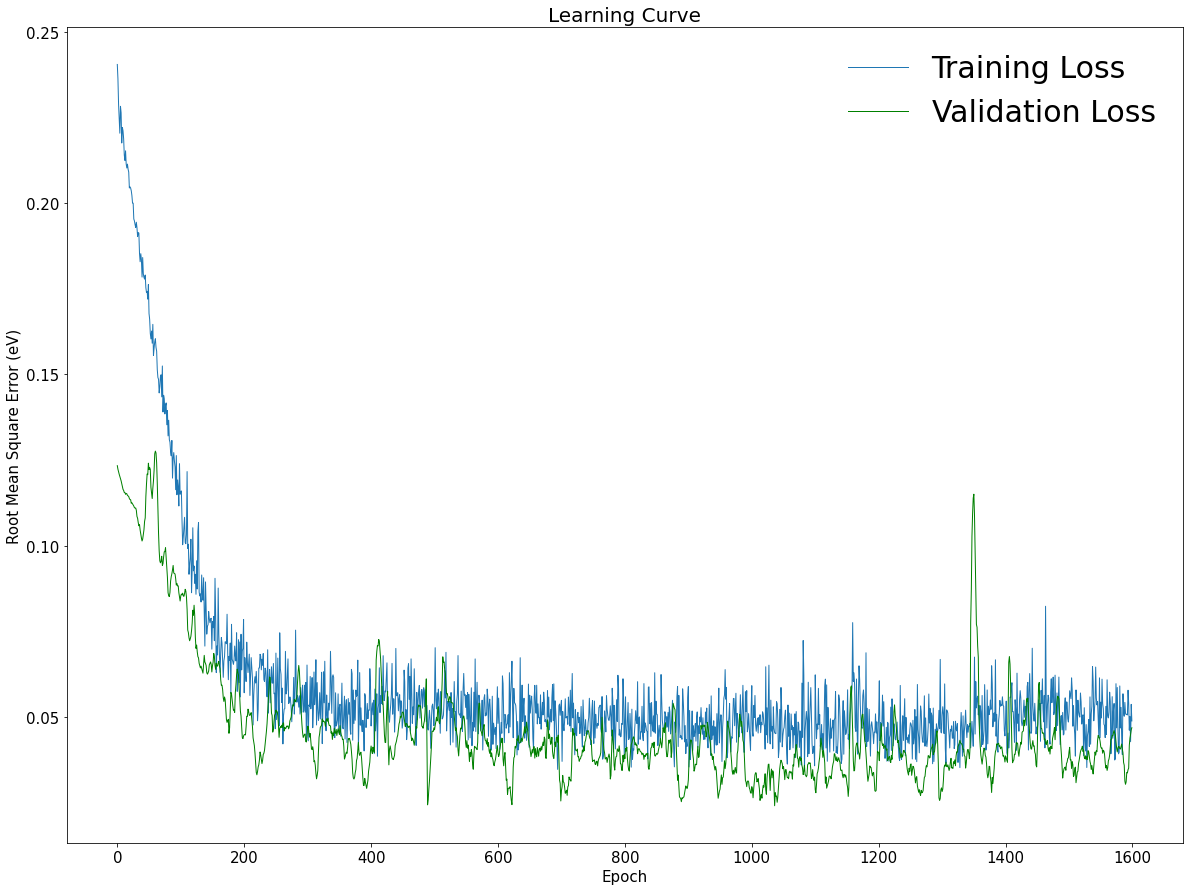

In [66]:
training_losses = model_history_rmse.history['loss']
validation_losses = model_history_rmse.history['val_loss']

plt.figure(figsize=(20, 15))
plt.plot(training_losses, label="Training Loss", linewidth = 1)
plt.plot(validation_losses, label="Validation Loss", linewidth = 1, c='g')
plt.title('Learning Curve', fontsize = 20)
plt.xlabel('Epoch', fontsize = 15)
plt.ylabel('Root Mean Square Error (eV)', fontsize = 15)
plt.legend(frameon=False, fontsize = 30);

# 6. Regressor Performance Plots

In [67]:
GBR.fit(X_train, y_train)
KNR.fit(X_train, y_train)
RFR.fit(X_train, y_train)
SR.fit(X_train, y_train)
ridge.fit(X_train, y_train)
xgbr.fit(X_train, y_train)
xgbr_optimized.fit(X_train, y_train)
light.fit(X_train, y_train)
nn = load_model('model_best_weights.h5', num_cols = len(features.columns))

In [90]:
def trendline(xd, yd, i, name, rmse, ax, order=1, c='k', alpha=1, Rval=False):
    """Make a line of best fit"""

    # Calculate trendline
    coeffs = np.polyfit(xd, yd, order)

    intercept = coeffs[-1]
    slope = coeffs[-2]
    power = coeffs[0] if order == 2 else 0

    minxd = np.min(xd)
    maxxd = np.max(xd)

    xl = np.array([minxd, maxxd])
    yl = power * xl ** 2 + slope * xl + intercept

    # Plot trendline
    if i <= 3:
        ax[0, i].plot(xl, yl, c, alpha=alpha, linestyle='--', linewidth=0.8)

    if i > 3:
        ax[1, i - 4].plot(xl, yl, c, alpha=alpha, linestyle='--', linewidth=0.8)

    # Calculate R Squared
    p = np.poly1d(coeffs)

    ybar = np.sum(yd) / len(yd)
    ssreg = np.sum((p(xd) - ybar) ** 2)
    sstot = np.sum((yd - ybar) ** 2)
    Rsqr = ssreg / sstot

    if not Rval:
        # Plot R^2 value
        if i <= 3:
            ax[0, i].text(0.25, 0.07, name, fontsize=18)
            ax[0, i].text(0.25, 0.04, '$MAE = %0.3f$' % mae, fontsize=18)
            ax[0, i].text(0.25, 0.01, '$RMSE = %0.3f$' % rmse, fontsize=18)
            ax[0, i].text(0.25, -0.02, '$R^2 = %0.3f$' % Rsqr, fontsize=18)
        if i > 3:
            ax[1, i - 4].text(0.25, 0.07, name, fontsize=18)
            ax[1, i - 4].text(0.25, 0.04, '$MAE = %0.3f$' % mae, fontsize=18)
            ax[1, i - 4].text(0.25, 0.01, '$RMSE = %0.3f$' % rmse, fontsize=18)
            ax[1, i - 4].text(0.25, -0.02, '$R^2 = %0.3f$' % Rsqr, fontsize=18)
    else:
        # Return the R^2 value:
        return Rsqr


def plot_data(train_data, test_data, i, name, rmse, mae, ax):
    if i <= 3:
        # Plot data
        ax[0, i].scatter(train_data['G_co (eV)'], train_data['prediction'], label="Training Set",
                         alpha=1, marker='o', s=25)
        ax[0, i].scatter(test_data['G_co (eV)'], test_data['prediction'], label='Testing Set',
                         alpha=1, marker='o', s=25)
        #ax[0,i].set_title(name, fontsize=15)

        # Combine data for best fit line
        x = pd.concat([train_data['G_co (eV)'], test_data['G_co (eV)']])
        y = pd.concat([train_data['prediction'], test_data['prediction']])

        # plot best fit line
        trendline(x, y, i, name, rmse, ax)

        # plot legend/axis
        ax[0, i].legend(loc='upper left', fontsize=18, frameon=False)

    if i > 3:
        # Plot data
        ax[1, i - 4].scatter(train_data['G_co (eV)'], train_data['prediction'], label="Training Set",
                             alpha=1, marker='o', s=25)
        ax[1, i - 4].scatter(test_data['G_co (eV)'], test_data['prediction'], label='Testing Set',
                             alpha=1, marker='o', s=25)
        # ax[1,i-4].set_title(name, fontsize=15)

        # Combine data to create best fit line
        x = pd.concat([train_data['G_co (eV)'], test_data['G_co (eV)']])
        y = pd.concat([train_data['prediction'], test_data['prediction']])

        # Plot best fit line
        trendline(x, y, i, name, rmse, ax)

        # Plot legend/axis
        ax[1, i - 4].legend(loc='upper left', fontsize=18, frameon=False)

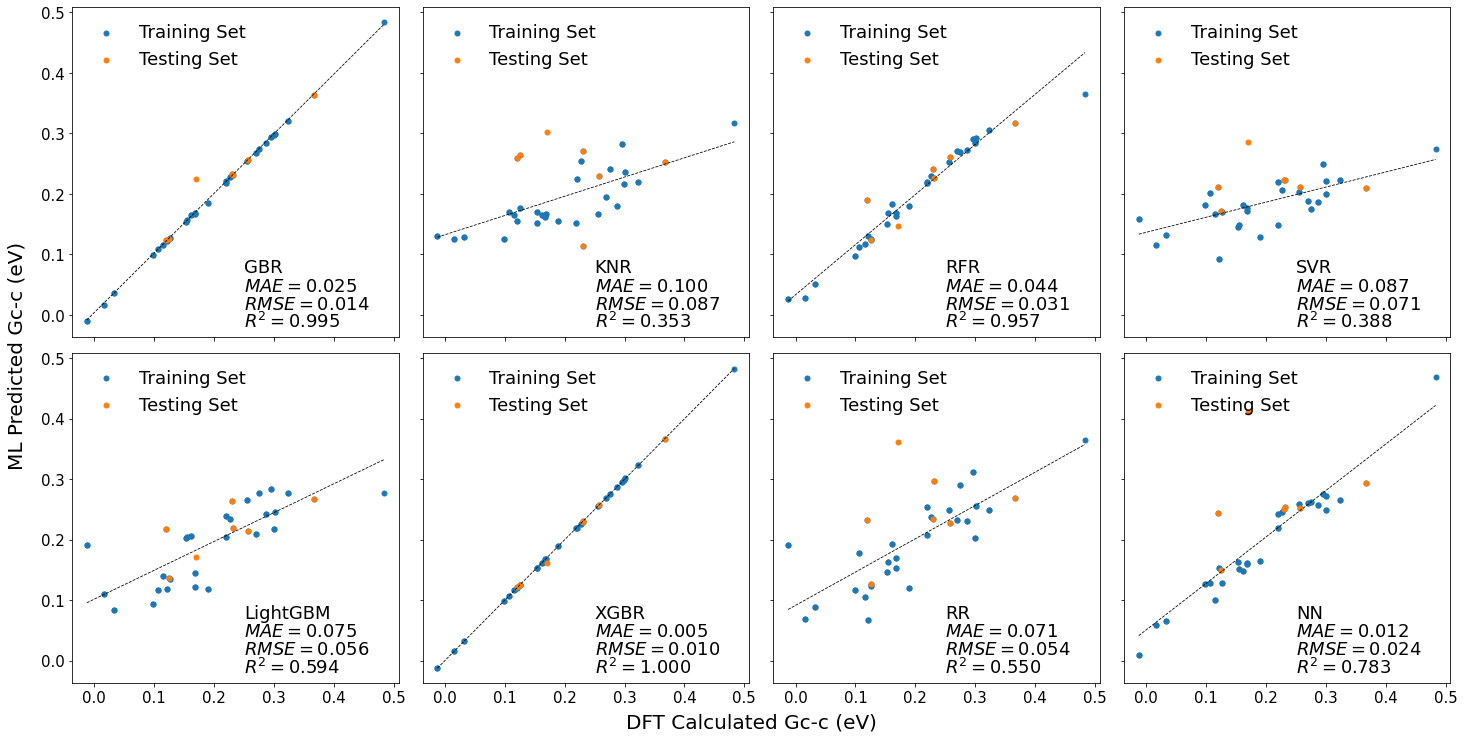

In [91]:
fig, ax = plt.subplots(nrows=2, ncols=4, sharex = True, sharey = True, figsize = (20, 10))

regressors = [GBR, KNR, RFR, SR, light, xgbr_optimized, ridge, nn]

names = {
    
    GBR: 'GBR',
    KNR: 'KNR',
    RFR: 'RFR',
    SR: 'SVR',
    light: 'LightGBM',
    xgbr_optimized: 'XGBR',
    ridge: 'RR',
    nn: 'NN'
    
}

RMSE = {
    
    GBR: results_df.iloc[-1, 0][0],
    KNR: results_df.iloc[-1, 1][0],
    RFR: results_df.iloc[-1, 2][0],
    SR: results_df.iloc[-1, 3][0],
    light: results_df.iloc[-1, 6][0],
    xgbr_optimized: optimized_xgbr_rmse,
    ridge: results_df.iloc[-1, 4][0],
    nn: nn_RMSE
    
}

MAE = {
    
    GBR: results_df.iloc[-1, 0][1],
    KNR: results_df.iloc[-1, 1][1],
    RFR: results_df.iloc[-1, 2][1],
    SR: results_df.iloc[-1, 3][1],
    light: results_df.iloc[-1, 6][1],
    xgbr_optimized: optimized_xgbr_mae,
    ridge: results_df.iloc[-1, 4][1],
    nn: nn_MAE
    
}

# Make Gco predictions on training and testing data using each regressor
for i, reg in enumerate(regressors):
    
    name = names[reg]
    rmse = RMSE[reg]
    mae = MAE[reg]
    
    
    # Predicting training data
    train_data = X_train.copy()
    train_data['G_co (eV)'] = y_train.copy()
    train_data['prediction'] = reg.predict(train_data.iloc[:, :-1])    
    
    # Predicting testing data
    test_data = X_test.copy()
    test_data['G_co (eV)'] = y_test.copy()
    test_data['prediction'] = reg.predict(test_data.iloc[:, :-1])    
    
    # Plotting the performance of each regressor
    plot_data(train_data, test_data, i, name, rmse, mae, ax)

fig.text(0.5, -0.01, 'DFT Calculated Gc-c (eV)', ha='center', va='center', fontsize = 20)
fig.text(-0.01, 0.5, 'ML Predicted Gc-c (eV)', ha='center', va='center', rotation='vertical', fontsize = 20)
fig.tight_layout(pad = 1);

# 7. XGBR Prediction on Full Dataset

In [133]:
prediction_df = pd.read_csv('CO Hydrogenation Full Data (with I).csv')

In [134]:
adsorbates = prediction_df[['Adsorbate 1', 'Adsorbate 2']]

In [135]:
prediction_df

,Adsorbate 1,Adsorbate 2,num of NM atoms 1,num of NM atoms 2,num of H 1,num of H 2,Atomic num 1,Atomic num 2,PE 1,PE 2,...,IE 1 add IE 2,Average EA of Adsorbates squared,Average PE of Adsorbates squared,Average Covalent Radius of Adosrbates squared,Average FIE of Adsorbates squared,Average VdW Radius squared,Average Atomic num of Adsorbates squared,Average num of Valence Electron squared,Average IE squared,G_CHO - Gco
0,O,O,1.0,1.0,0.0,0.0,8.0,8.0,3.44,3.44,...,27.24,2.13,11.83,0.40,185.45,2.31,64.00,36.00,185.50,0.17026
1,O,OH,1.0,2.0,0.0,1.0,8.0,4.5,3.44,2.82,...,26.64,1.65,9.80,0.31,185.31,2.07,39.06,42.25,177.42,0.29583
2,O,N,1.0,1.0,0.0,0.0,8.0,7.0,3.44,3.04,...,28.15,0.48,10.50,0.45,198.13,2.36,56.25,30.25,198.11,NaN
3,O,NH,1.0,2.0,0.0,1.0,8.0,4.0,3.44,2.62,...,26.42,0.81,9.18,0.33,191.60,2.10,36.00,36.00,174.50,NaN
4,O,NH2,1.0,3.0,0.0,2.0,8.0,3.0,3.44,2.48,...,24.40,0.94,8.76,0.29,189.45,2.01,30.25,42.25,148.84,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,I,SH2,1.0,3.0,0.0,2.0,53.0,6.0,2.66,2.33,...,20.91,4.53,6.22,0.89,131.90,2.86,870.25,56.25,109.31,NaN
285,I,F,1.0,1.0,0.0,0.0,53.0,9.0,2.66,3.98,...,27.87,10.43,11.02,0.97,194.23,2.98,961.00,49.00,194.18,NaN
286,I,Cl,1.0,1.0,0.0,0.0,53.0,17.0,2.66,3.16,...,23.42,11.13,8.47,1.35,137.10,3.48,1225.00,49.00,137.12,NaN
287,I,Br,1.0,1.0,0.0,0.0,53.0,35.0,2.66,2.96,...,22.26,10.31,7.90,1.53,123.93,3.67,1936.00,49.00,123.88,NaN


In [136]:
# Savings the Gco column
targets = prediction_df['G_CHO - Gco']

In [137]:
diff = prediction_df.columns.difference(test_data.columns)

In [138]:
# Removing all columns that were deleted in feature selection to maintain the same prediction features as training
prediction_df = prediction_df.drop(prediction_df.columns.difference(test_data.columns), 1)

In [139]:
prediction_df.columns

Index(['num of Atoms', 'Average Atomic num', 'Average PE',
       'Average Covalent Radius', 'Average IE', 'Average EA',
       'Average num of Valence Electron', 'PE 1 minus PE 2',
       'Covalent Radius 1 minus Covalent Radius 2',
       'VdW Radius 1 minus VdW Radius 2', 'FIE 1 minus FIE 2',
       'EA 1 minus EA 2', 'num of Valence 1 minus num of Valence 2',
       'IE 1 minus IE 2'],
      dtype='object')

In [140]:
df_v5.columns

Index(['num of Atoms', 'Average Atomic num', 'Average PE',
       'Average Covalent Radius', 'Average IE', 'Average EA',
       'Average num of Valence Electron', 'PE 1 minus PE 2',
       'Covalent Radius 1 minus Covalent Radius 2',
       'VdW Radius 1 minus VdW Radius 2', 'FIE 1 minus FIE 2',
       'EA 1 minus EA 2', 'num of Valence 1 minus num of Valence 2',
       'IE 1 minus IE 2', 'G_CHO - Gco'],
      dtype='object')

In [141]:
def scaler(df):
    
    base = pd.read_csv('CO Hydrogenation Full Data.csv')
    base = base.drop(columns = ['Adsorbate 1', 'Adsorbate 2', 'G_CHO - Gco'])
    scales = {}
    for i in range(len(base.columns)):
        name = base.columns[i]
        minimum = min(base.iloc[:, i])
        maximum = max(base.iloc[:, i])
        scales[name] = [minimum, maximum]
    
    for i in range(len(df.columns)):
        name_1 = df.columns[i]
        if name_1 == 'G_CHO - Gco':
            pass
        else:
            for j, row in enumerate(df[name_1]):
                df.iloc[j, i] = (row - scales[name_1][0]) / (scales[name_1][1] - scales[name_1][0])
        
    return df


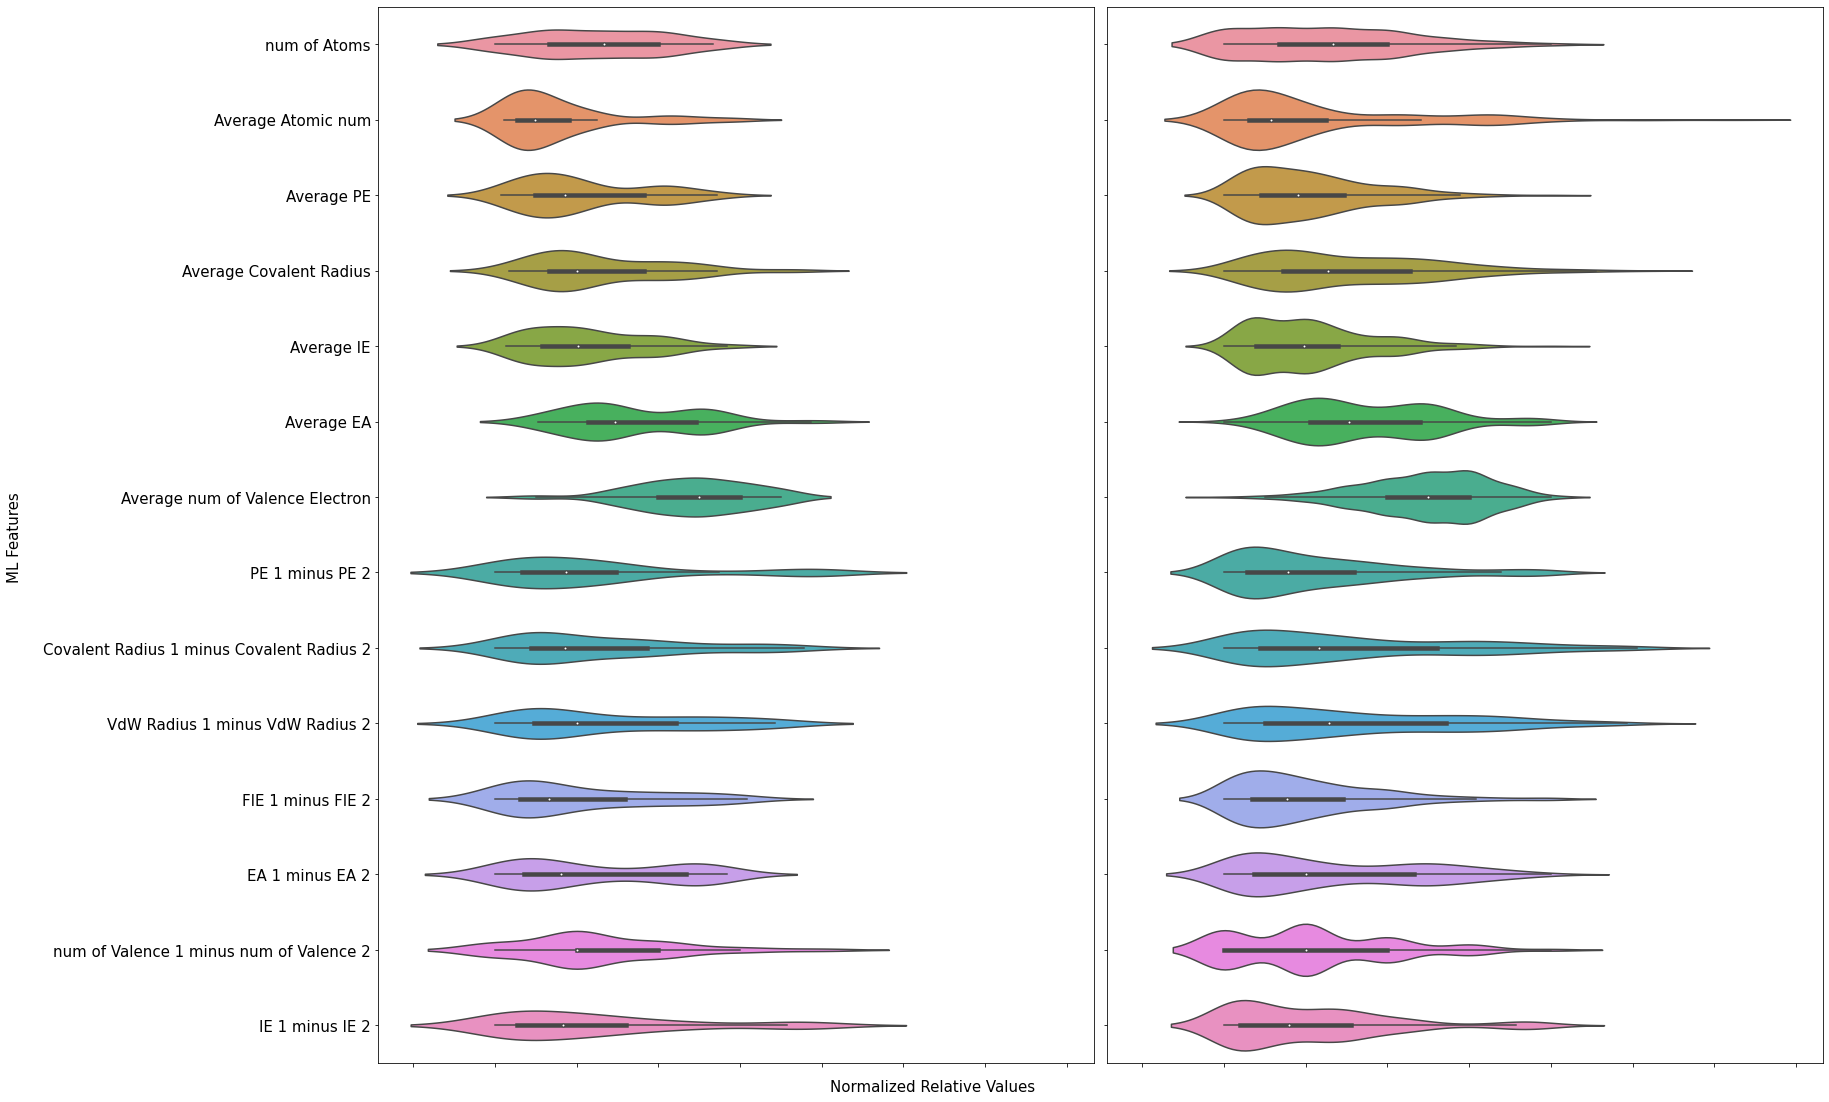

In [142]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey = True, sharex = True, figsize = (25, 15))

training_df = scaler(df_v5.copy())
training_df = training_df.iloc[:, :-1].melt(var_name='Features', value_name='Values')

full_df = scaler(prediction_df.copy())
full_df = full_df.melt(var_name='Features', value_name='Values')

sns.violinplot(x = 'Values', y = 'Features', data = training_df, ax=ax[0]).set(xticklabels=[])
sns.violinplot(x = 'Values', y = 'Features', data = full_df, ax=ax[1]).set(xticklabels=[])

ax[0].set_ylabel('')    
ax[0].set_xlabel('')
ax[1].set_ylabel('')    
ax[1].set_xlabel('')

fig.text(0.5, -0.01, 'Normalized Relative Values', ha='center', va='center', fontsize = 15)
fig.text(-0.01, 0.5, 'ML Features', ha='center', va='center', rotation='vertical', fontsize = 15)
fig.tight_layout(pad = 1);

In [143]:
'''fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey = True, sharex = True, figsize = (25, 15))

x = list(prediction_df.columns)

training_df = scaler(df_v5.copy())
full_df = scaler(prediction_df.copy())

ax1.violinplot(training_df.iloc[:, :-1].T, vert=False)
ax2.violinplot(full_df.T, vert=False)

for ax in [ax1, ax2]:
    set_axis_style(ax, x)

fig.text(0.5, -0.01, 'ML Features', ha='center', va='center', fontsize = 20)
fig.text(-0.01, 0.5, 'Relative Values', ha='center', va='center', rotation='vertical', fontsize = 20)
fig.tight_layout(pad = 1);'''

"fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey = True, sharex = True, figsize = (25, 15))\n\nx = list(prediction_df.columns)\n\ntraining_df = scaler(df_v5.copy())\nfull_df = scaler(prediction_df.copy())\n\nax1.violinplot(training_df.iloc[:, :-1].T, vert=False)\nax2.violinplot(full_df.T, vert=False)\n\nfor ax in [ax1, ax2]:\n    set_axis_style(ax, x)\n\nfig.text(0.5, -0.01, 'ML Features', ha='center', va='center', fontsize = 20)\nfig.text(-0.01, 0.5, 'Relative Values', ha='center', va='center', rotation='vertical', fontsize = 20)\nfig.tight_layout(pad = 1);"

In [144]:
# Adding the Gco column back
prediction_df['G_CHO - Gco'] = targets

In [145]:
def ml_predict(dataframe, name, reg):
    dataframe['Ghyd_ML'] = np.nan
    for i, col in enumerate(dataframe['Ghyd_ML']):
        if pd.isnull(col):
            dataframe.iloc[i, -1] = reg.predict(pd.DataFrame(dataframe.iloc[i, 0:-2]).T)

    dataframe['Ghyd_Final'] = dataframe[name]
    for i, col in enumerate(dataframe['Ghyd_Final']):
        if pd.isnull(col):
            dataframe.iloc[i, -1] = reg.predict(pd.DataFrame(dataframe.iloc[i, 0:-3]).T)

In [146]:
prediction_df

,num of Atoms,Average Atomic num,Average PE,Average Covalent Radius,Average IE,Average EA,Average num of Valence Electron,PE 1 minus PE 2,Covalent Radius 1 minus Covalent Radius 2,VdW Radius 1 minus VdW Radius 2,FIE 1 minus FIE 2,EA 1 minus EA 2,num of Valence 1 minus num of Valence 2,IE 1 minus IE 2,G_CHO - Gco
0,1.0,8.00,3.44,0.63,13.62,1.46,6.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.17026
1,1.5,6.25,3.13,0.56,13.32,1.28,6.5,0.62,0.15,0.16,0.01,0.35,1.0,0.60,0.29583
2,1.0,7.50,3.24,0.67,14.08,0.70,5.5,0.40,0.08,0.03,0.92,1.53,1.0,0.91,NaN
3,1.5,6.00,3.03,0.58,13.21,0.90,6.0,0.82,0.11,0.15,0.45,1.12,0.0,0.82,NaN
4,2.0,5.50,2.96,0.54,12.20,0.97,6.5,0.96,0.18,0.20,0.29,0.98,1.0,2.84,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,2.0,29.50,2.49,0.95,10.46,2.13,7.5,0.33,0.77,0.58,2.07,1.86,1.0,0.01,NaN
285,1.0,31.00,3.32,0.99,13.94,3.23,7.0,1.32,0.69,0.51,6.97,0.34,0.0,6.97,NaN
286,1.0,35.00,2.91,1.16,11.71,3.34,7.0,0.50,0.34,0.23,2.52,0.55,0.0,2.52,NaN
287,1.0,44.00,2.81,1.24,11.13,3.21,7.0,0.30,0.19,0.13,1.36,0.30,0.0,1.36,NaN


In [147]:
ml_predict(prediction_df, 'G_CHO - Gco' ,xgbr_optimized)

In [148]:
prediction_df

,num of Atoms,Average Atomic num,Average PE,Average Covalent Radius,Average IE,Average EA,Average num of Valence Electron,PE 1 minus PE 2,Covalent Radius 1 minus Covalent Radius 2,VdW Radius 1 minus VdW Radius 2,FIE 1 minus FIE 2,EA 1 minus EA 2,num of Valence 1 minus num of Valence 2,IE 1 minus IE 2,G_CHO - Gco,Ghyd_ML,Ghyd_Final
0,1.0,8.00,3.44,0.63,13.62,1.46,6.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.17026,0.161785,0.170260
1,1.5,6.25,3.13,0.56,13.32,1.28,6.5,0.62,0.15,0.16,0.01,0.35,1.0,0.60,0.29583,0.296004,0.295830
2,1.0,7.50,3.24,0.67,14.08,0.70,5.5,0.40,0.08,0.03,0.92,1.53,1.0,0.91,NaN,0.026683,0.026683
3,1.5,6.00,3.03,0.58,13.21,0.90,6.0,0.82,0.11,0.15,0.45,1.12,0.0,0.82,NaN,0.102289,0.102289
4,2.0,5.50,2.96,0.54,12.20,0.97,6.5,0.96,0.18,0.20,0.29,0.98,1.0,2.84,NaN,0.133847,0.133847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,2.0,29.50,2.49,0.95,10.46,2.13,7.5,0.33,0.77,0.58,2.07,1.86,1.0,0.01,NaN,0.167547,0.167547
285,1.0,31.00,3.32,0.99,13.94,3.23,7.0,1.32,0.69,0.51,6.97,0.34,0.0,6.97,NaN,0.140765,0.140765
286,1.0,35.00,2.91,1.16,11.71,3.34,7.0,0.50,0.34,0.23,2.52,0.55,0.0,2.52,NaN,0.242080,0.242080
287,1.0,44.00,2.81,1.24,11.13,3.21,7.0,0.30,0.19,0.13,1.36,0.30,0.0,1.36,NaN,0.266600,0.266600


In [149]:
b = np.sqrt(((prediction_df['G_CHO - Gco'] - prediction_df['Ghyd_ML'])**2).mean()).round(4)

In [150]:
print('Training RMSE: {}'.format(optimized_xgbr_rmse.round(4)))
print('Testing RMSE: {}'.format(b))

Training RMSE: 0.0102
Testing RMSE: 0.0012


In [151]:
prediction_df['Ghyd_Final'].describe()

count    289.000000
mean       0.178371
std        0.081246
min       -0.024587
25%        0.125760
50%        0.178204
75%        0.231160
max        0.483390
Name: Ghyd_Final, dtype: float64

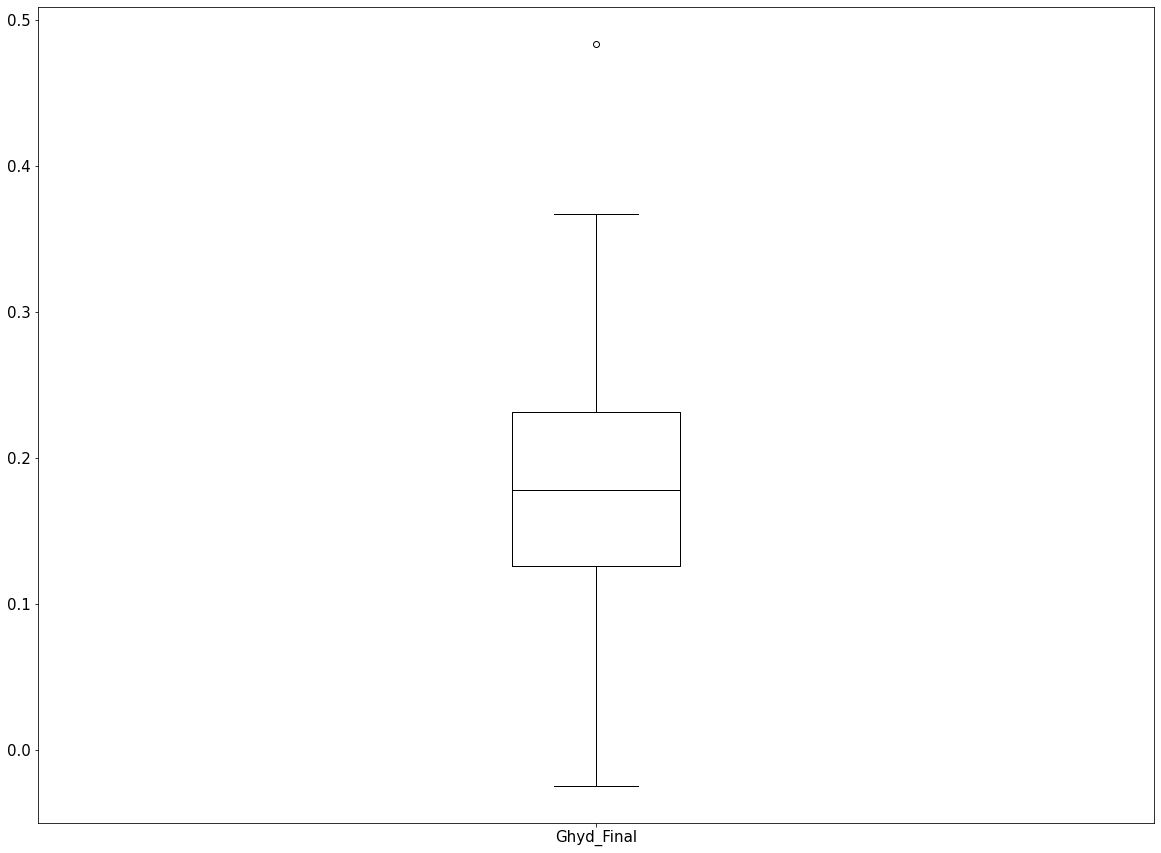

In [152]:
prediction_df.boxplot(color=dict(boxes='black', whiskers='black', medians='black', caps='black'), 
                      column='Ghyd_Final', grid=False, figsize=(20, 15));

In [153]:
final = adsorbates.join(prediction_df, how = 'left')

In [154]:
final

,Adsorbate 1,Adsorbate 2,num of Atoms,Average Atomic num,Average PE,Average Covalent Radius,Average IE,Average EA,Average num of Valence Electron,PE 1 minus PE 2,Covalent Radius 1 minus Covalent Radius 2,VdW Radius 1 minus VdW Radius 2,FIE 1 minus FIE 2,EA 1 minus EA 2,num of Valence 1 minus num of Valence 2,IE 1 minus IE 2,G_CHO - Gco,Ghyd_ML,Ghyd_Final
0,O,O,1.0,8.00,3.44,0.63,13.62,1.46,6.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.17026,0.161785,0.170260
1,O,OH,1.5,6.25,3.13,0.56,13.32,1.28,6.5,0.62,0.15,0.16,0.01,0.35,1.0,0.60,0.29583,0.296004,0.295830
2,O,N,1.0,7.50,3.24,0.67,14.08,0.70,5.5,0.40,0.08,0.03,0.92,1.53,1.0,0.91,NaN,0.026683,0.026683
3,O,NH,1.5,6.00,3.03,0.58,13.21,0.90,6.0,0.82,0.11,0.15,0.45,1.12,0.0,0.82,NaN,0.102289,0.102289
4,O,NH2,2.0,5.50,2.96,0.54,12.20,0.97,6.5,0.96,0.18,0.20,0.29,0.98,1.0,2.84,NaN,0.133847,0.133847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,I,SH2,2.0,29.50,2.49,0.95,10.46,2.13,7.5,0.33,0.77,0.58,2.07,1.86,1.0,0.01,NaN,0.167547,0.167547
285,I,F,1.0,31.00,3.32,0.99,13.94,3.23,7.0,1.32,0.69,0.51,6.97,0.34,0.0,6.97,NaN,0.140765,0.140765
286,I,Cl,1.0,35.00,2.91,1.16,11.71,3.34,7.0,0.50,0.34,0.23,2.52,0.55,0.0,2.52,NaN,0.242080,0.242080
287,I,Br,1.0,44.00,2.81,1.24,11.13,3.21,7.0,0.30,0.19,0.13,1.36,0.30,0.0,1.36,NaN,0.266600,0.266600


In [155]:
# Save the predicted dataframe
final.to_csv('predicted_Ghyd_xgbr.csv')

# 8. delta_Gco Heat Map

In [180]:
adsorbates = final['Adsorbate 1'].unique()
binding_energy = final['Ghyd_Final']

In [181]:
binding_energy

0      0.170260
1      0.295830
2      0.026683
3      0.102289
4      0.133847
         ...   
284    0.167547
285    0.140765
286    0.242080
287    0.266600
288    0.307606
Name: Ghyd_Final, Length: 289, dtype: float64

In [182]:
def transform_2D(series):
    result = []
    temp = []
    count = 1
    for i in series:
        if count % 18 != 0:
            temp.append(i)
            count += 1
        else:
            count = 1
            result.append(temp)
            temp = []
            temp.append(i)
            count += 1
    result.append(temp)
    return result

In [183]:
# Transform series into a 2D array
twoD = transform_2D(binding_energy)

In [184]:
twoD

[[0.17026,
  0.29583000000000004,
  0.026683112606406212,
  0.10228859633207321,
  0.13384711742401123,
  0.08268923312425613,
  0.18552665412425995,
  0.1946314126253128,
  0.2238570600748062,
  0.33497828245162964,
  0.13808324933052063,
  0.3128235340118408,
  0.2479623407125473,
  0.28730902075767517,
  0.30107,
  0.2928048372268677,
  0.19688238203525543],
 [0.29583000000000004,
  0.48339,
  -0.006354783661663532,
  0.23409534990787506,
  0.23803915083408356,
  0.12011,
  0.15317,
  0.16787,
  0.24060557782649994,
  0.19794858992099762,
  0.1714438647031784,
  0.20495982468128204,
  0.32325,
  0.23116,
  0.2779328525066376,
  0.22275882959365845,
  0.20321789383888245],
 [0.026683112606406212,
  -0.006354783661663532,
  0.0785125344991684,
  0.00960809737443924,
  -0.02458658069372177,
  0.193085178732872,
  0.09894,
  0.03693113476037979,
  0.0371214896440506,
  0.12575999999999998,
  0.03232,
  0.019387956708669662,
  0.19473454356193542,
  0.11668764054775238,
  0.0707272738218

In [185]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from matplotlib.colors import ListedColormap




#Plotting
trace = go.Heatmap(z = twoD,
                   x = adsorbates,
                   y = adsorbates,
                   colorscale = 'YlOrBr',
                   colorbar   = dict(title = "Delta_Ghyd",
                                     titleside = "right"
                                    )
                  )

layout = go.Layout(dict(title = "Gc-c for different adsorbate combinations",
                        autosize = False,
                        height  = 1000,
                        width   = 1000,
                        yaxis   = dict(tickfont = dict(size = 15)),
                        xaxis   = dict(tickfont = dict(size = 15))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

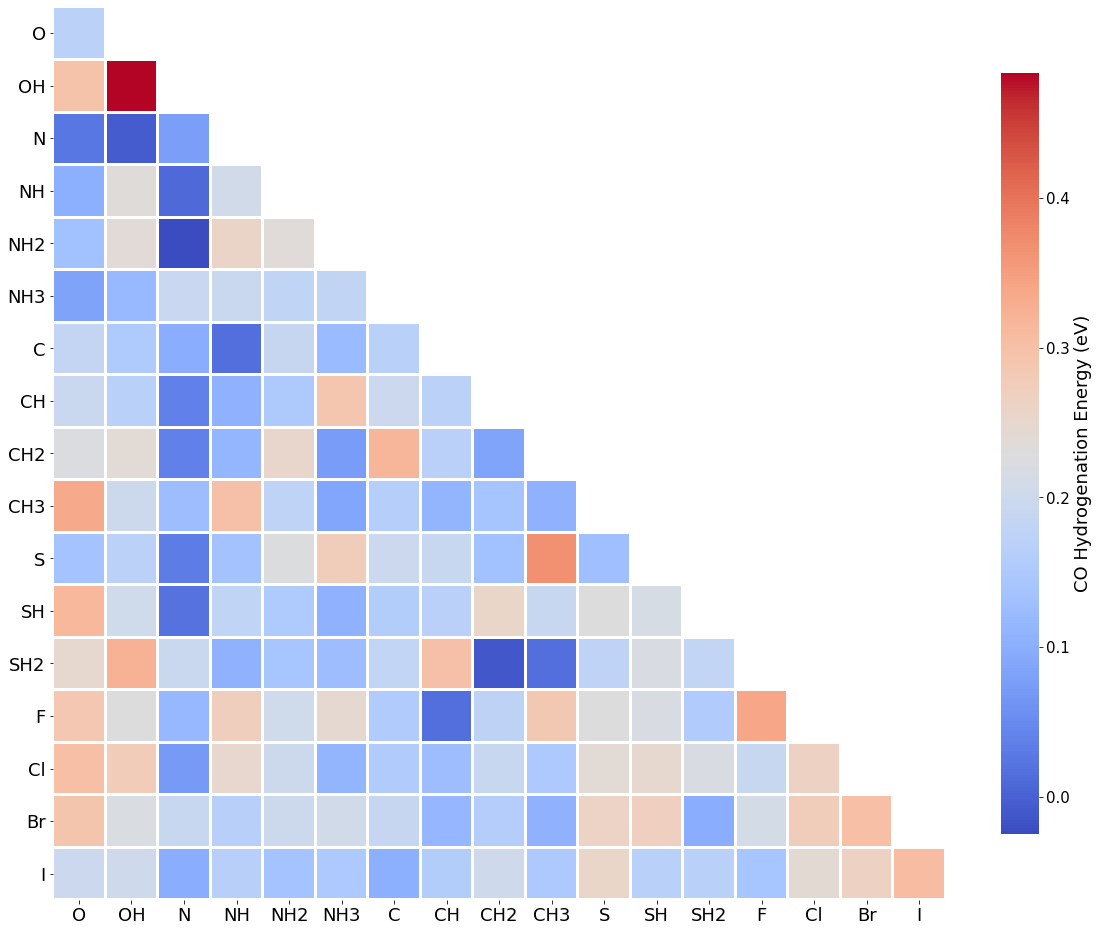

In [188]:
import matplotlib

cmap1 = matplotlib.colors.ListedColormap(['g'])
mask = np.tril(np.ones_like(twoD, dtype=bool))

ax = sns.heatmap(twoD, linewidth=2, mask = 1 - mask,
                 cmap = "coolwarm", square = True, cbar_kws={'label': 'CO Hydrogenation Energy (eV)', 'shrink': 0.7})
ax.figure.axes[-1].yaxis.label.set_size(18)

#ax = sns.heatmap(twoD, linewidth=2, mask = np.array(twoD) < 0.3, cmap = cmap1, square = True, cbar=False)

ax.set_xticklabels(adsorbates, rotation = 0, size = 18)
ax.set_yticklabels(adsorbates, rotation = 0, size = 18)

plt.show()